## What's Special in this version
Changing the previous code just to use <font color='red'> ReLu instead of Sigmoid</font> and compare the results

## Results
<font color='red'>Took 9 mins to run (for m = 100 and n_iter = 50_00_000)</font>  
For higher number of iterations : Working super fine with ReLu too!<br/>   
Also clearly can see the decision making function in the bottom plot!

## Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample


def percentage(x):return f"{round(100*x,4)}%"

In [2]:
# #generate data
# m = 10000
# x_train = np.random.rand(m)
# y_train = np.logical_and(x_train>0.5,x_train<0.75).astype(np.int16)

# x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))


# print(x_y)

### Generating an unbiased data set
We need to have %50 : 50%  positives:negatives

In [3]:
m = 100

pos_x = 0.25 + 0.5 * np.random.rand(m//2)
neg_x1 = 0 + 0.25 * np.random.rand(m//4)
neg_x2 = 0.75 + 0.25 * np.random.rand(m//4)
neg_x = np.concatenate((neg_x1,neg_x2))

x_train = np.concatenate((pos_x,neg_x))
y_train = np.logical_and(x_train>0.25,x_train<0.75).astype(np.int16)

x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))
print(x_y)

[[0.60196436 1.        ]
 [0.30117334 1.        ]
 [0.43837742 1.        ]
 [0.31111088 1.        ]
 [0.58021644 1.        ]
 [0.45406634 1.        ]
 [0.5695934  1.        ]
 [0.33391365 1.        ]
 [0.53077555 1.        ]
 [0.33175383 1.        ]
 [0.51960617 1.        ]
 [0.60138246 1.        ]
 [0.37179261 1.        ]
 [0.55521824 1.        ]
 [0.53056506 1.        ]
 [0.392183   1.        ]
 [0.35537527 1.        ]
 [0.42887599 1.        ]
 [0.25415868 1.        ]
 [0.69877482 1.        ]
 [0.36928857 1.        ]
 [0.54319061 1.        ]
 [0.28783281 1.        ]
 [0.37255878 1.        ]
 [0.42361484 1.        ]
 [0.73360577 1.        ]
 [0.69127225 1.        ]
 [0.50454866 1.        ]
 [0.32848579 1.        ]
 [0.41055047 1.        ]
 [0.32457478 1.        ]
 [0.44244057 1.        ]
 [0.36411567 1.        ]
 [0.56451053 1.        ]
 [0.41008944 1.        ]
 [0.49885024 1.        ]
 [0.5918837  1.        ]
 [0.63679049 1.        ]
 [0.56201326 1.        ]
 [0.35410017 1.        ]


### Noise to inputs

In [4]:
#introduce some noise in to x_train
PEAK_NOISE_FACTOR = 0.05
if 'need noise to x_train':
    noise =  PEAK_NOISE_FACTOR * (2*np.random.rand(len(x_train))-1)
    x_train += noise

### Train the weights

In [5]:
x_train_all, y_train_all = x_train, y_train

def sigmoid(t):return 1/(1+np.exp(-t))
def ReLu(t):return np.max((t,np.zeros(t.shape)),axis=0)
def fit():

    GUESSED_AMPLITUDE = 10
    w1,w2,b1,b2,theta1,theta2,k = (2*np.random.rand(7)-1) * GUESSED_AMPLITUDE

    print("initial:", w1,w2,b1,b2,theta1,theta2,k)
    n_iter = 3_0_000

    L_history = []
    x_train_indices = list(range(len(x_train_all)))

    for _ in range(n_iter):
        samples = sample(x_train_indices,100)
        x_train = x_train_all[samples]
        y_train = y_train_all[samples]


        z1 = ReLu(w1*x_train+b1)
        z2 = ReLu(w2*x_train+b2)
        A =  ReLu(theta1*z1+theta2*z2+k)
        diff = y_train-A

        # L = log of joint likelihood
        L = (y_train * np.log(A) + (1-y_train) * np.log(1 -A)).sum()
        L_history.append(L)
        # need to maximize
        dL_dk = diff.sum()
        dL_dtheta1 = (diff * z1).sum()
        dL_dtheta2 = (diff * z2).sum()
        dL_db1 = (diff * theta1 * (z1>0).astype(np.float64) ).sum()
        dL_db2 = (diff * theta2 * (z2>0).astype(np.float64) ).sum()
        dL_dw1 = (diff * theta1 * (z1>0).astype(np.float64) * x_train ).sum()
        dL_dw2 = (diff * theta2 * (z2>0).astype(np.float64) * x_train ).sum()

    #following four lines are the original code used for Sigmoid--- neglect them here because we are using ReLu now
    #     dL_db1 = (diff * theta1 * z1 * (1-z1) ).sum()
    #     dL_db2 = (diff * theta2 * z2 * (1 -z2) ).sum()
    #     dL_dw1 = (diff * theta1 * z1 * (1-z1) * x_train ).sum()
    #     dL_dw2 = (diff * theta2 * z2 * (1-z2) * x_train ).sum()


        #gradient accent
        lr = 1e-2/m

        w1 += lr * dL_dw1
        w2 += lr * dL_dw2
        b1 += lr * dL_db1
        b2 += lr * dL_db2
        theta1 += lr * dL_dtheta1
        theta2 += lr * dL_dtheta2
        k +=  lr * dL_dk



    print("final:", w1,w2,b1,b2,theta1,theta2,k)

#     plt.plot(L_history,label='Joint Likekihood vs. Iterration')
#     plt.show()
    return (w1,w2,b1,b2,theta1,theta2,k),L_history

In [6]:
if not 'need':
    z1 = ReLu(w1*x_train+b1)
    z2 = ReLu(w2*x_train+b2)
    A =  ReLu(theta1*z1+theta2*z2+k)

    y_hat = (A>0.5)

    print("Accuracy:",percentage(np.sum(y_hat == y_train)/len(y_train)))

In [7]:
if not 'need':
    x_set = [i/100 for i in range(0,100,4)]

    for x in x_set:
        z1 = ReLu(w1*x+b1)
        z2 = ReLu(w2*x+b2)
        A =  ReLu(theta1*z1+theta2*z2+k)
        print(x , "is between 0.25 and 0.75: ------------>" , A>0.5, "( A= ", A, ")")

### Results
Working super fine!\
Amazed by the accuracy:0.9992\
initial: -0.5076032176681249 -0.5161888079115744 -0.9797721258983405 0.3336572105934692 0.8192428213010876 0.8926597729557344 -0.9298152054573068
final: 21.743688970058535 -19.471327134725342 -5.59964282207095 14.43136556327099 16.785498226736504 16.844912960073945 -24.55654851478536

In [8]:
A = np.array([1,2,3,4,5])
A[[1,2,3]]

array([2, 3, 4])

In [9]:
# #defining and testing ReLu with numpy
# def ReLu(t):return np.max((t,np.zeros(t.shape)),axis=0)
# print(ReLu(np.array([-11,3,4])))

## Using parallel processors to run the code multiple times then chose the best one

In [10]:
#define a fit and evaluate combined function
def fit_and_evaluate4accuracy():
    (w1,w2,b1,b2,theta1,theta2,k),L_history = fit()
    z1 = ReLu(w1*x_train+b1)
    z2 = ReLu(w2*x_train+b2)
    A =  ReLu(theta1*z1+theta2*z2+k)

    y_hat = (A>0.5)

    accuracy = np.sum(y_hat == y_train)/len(y_train)
    
    return accuracy,(w1,w2,b1,b2,theta1,theta2,k),L_history
    

In [11]:
#parallely do multiple times
from joblib import Parallel, delayed
results = []
for _ in range(20):
    results.extend(Parallel(n_jobs=60)((

        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)(),
        delayed(fit_and_evaluate4accuracy)()

                                  )))

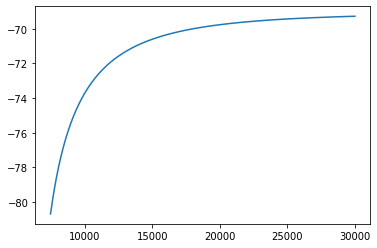

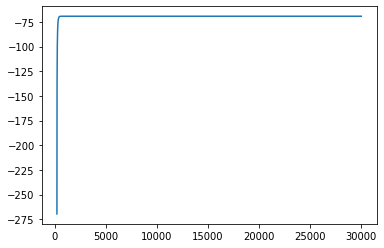

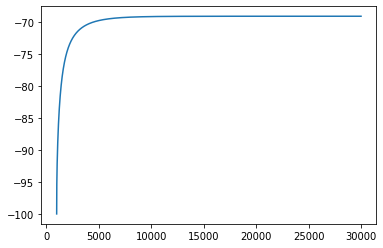

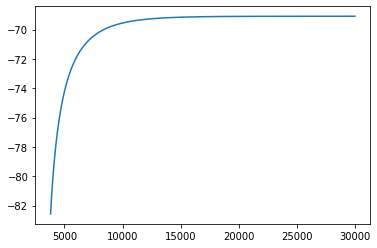

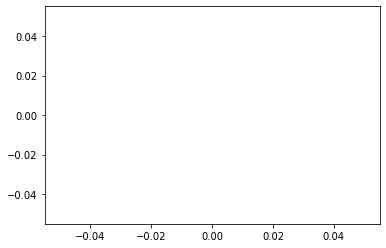

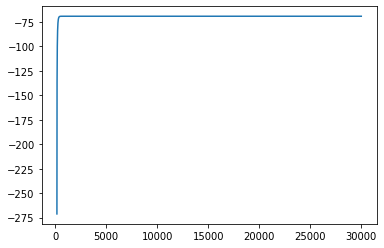

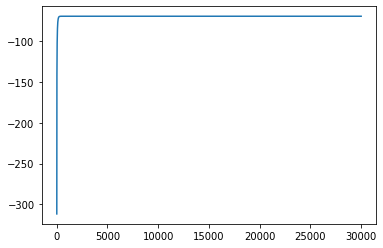

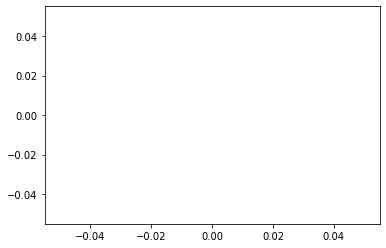

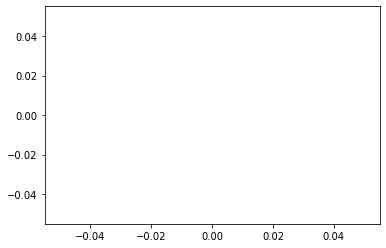

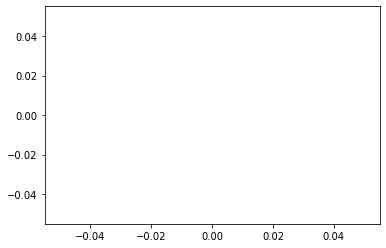

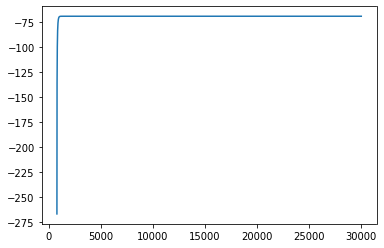

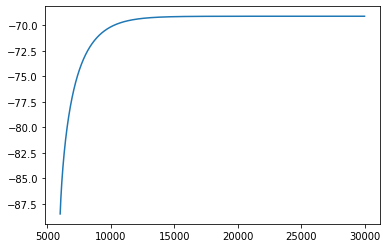

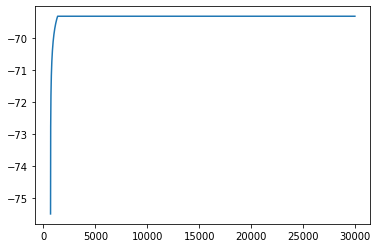

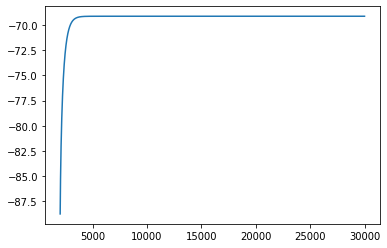

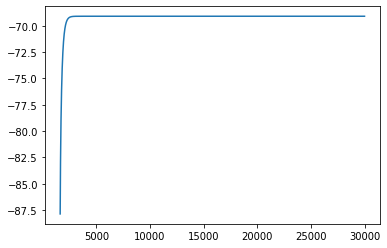

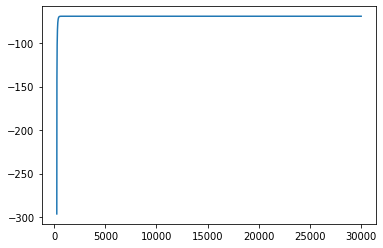

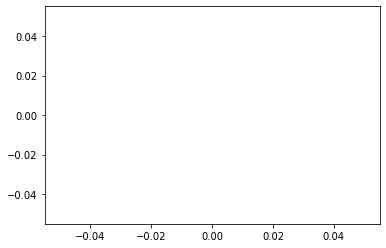

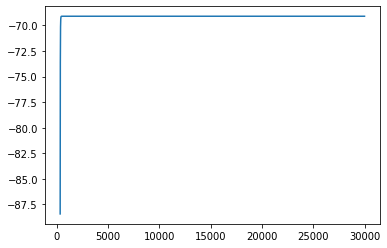

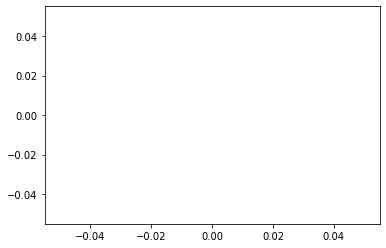

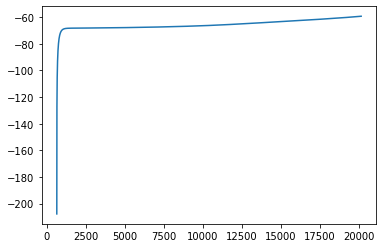

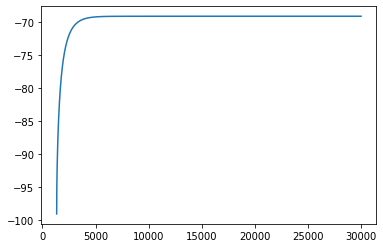

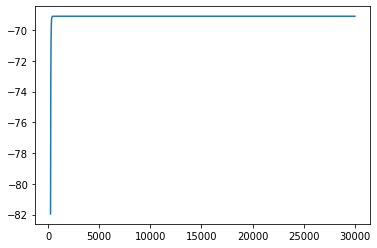

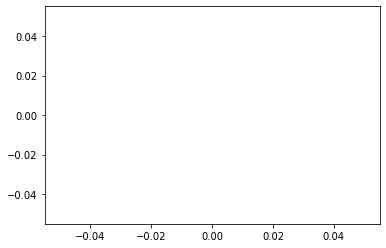

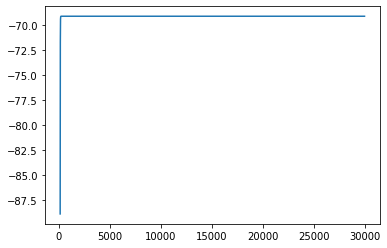

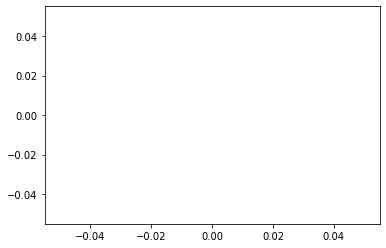

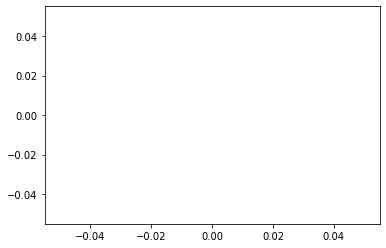

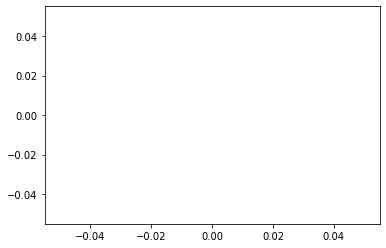

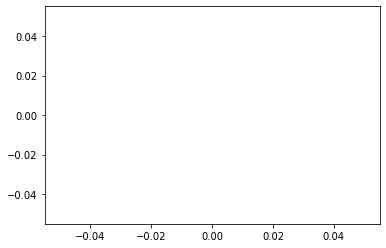

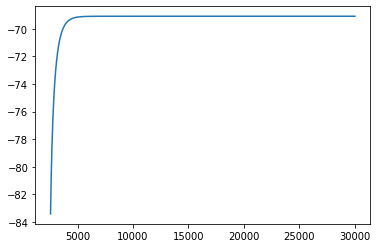

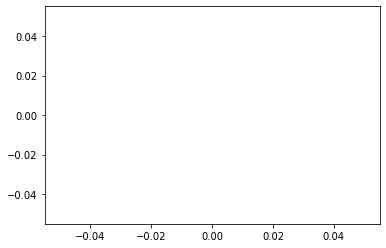

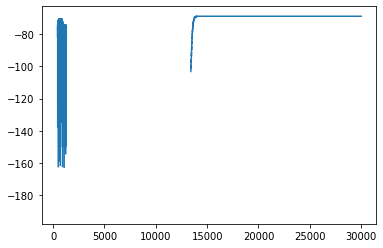

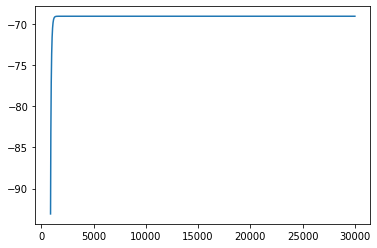

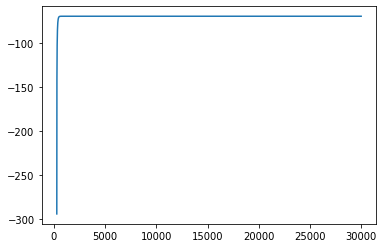

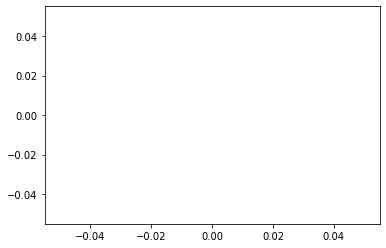

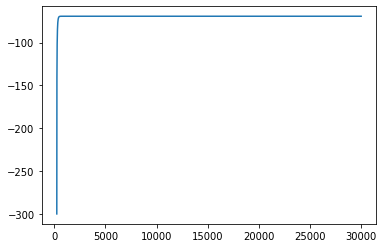

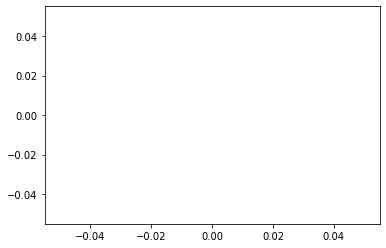

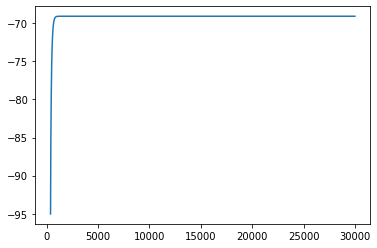

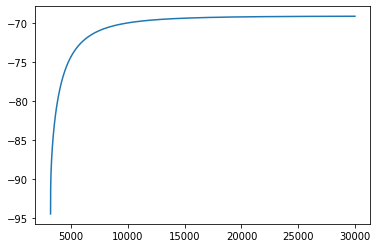

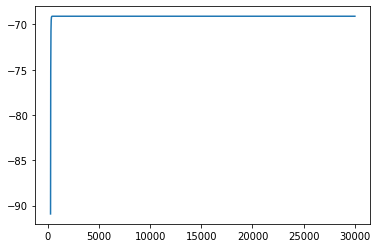

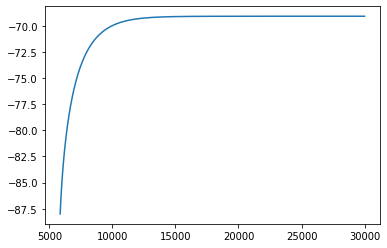

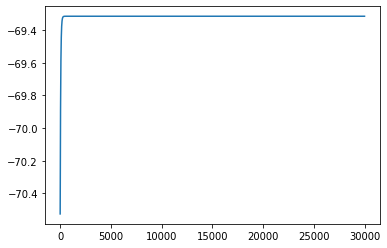

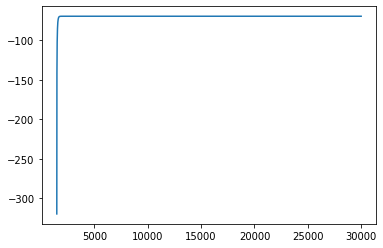

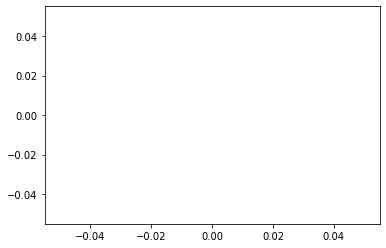

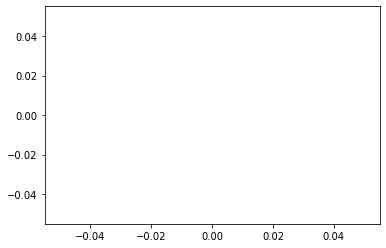

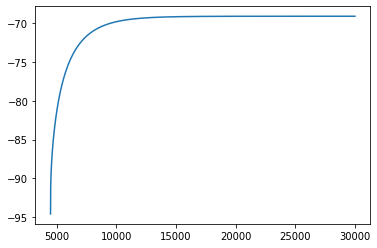

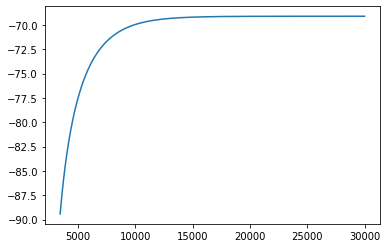

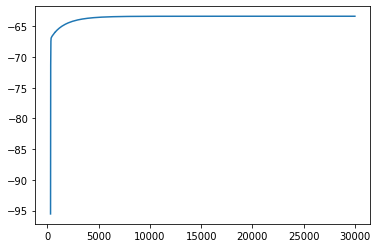

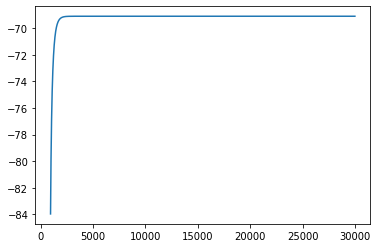

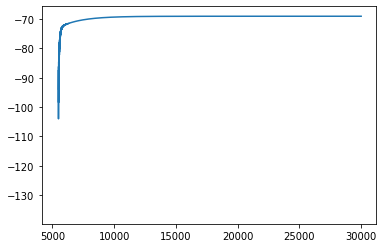

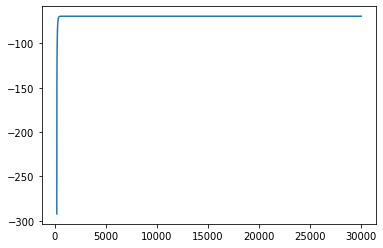

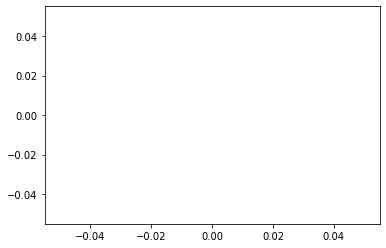

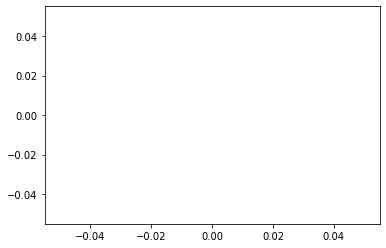

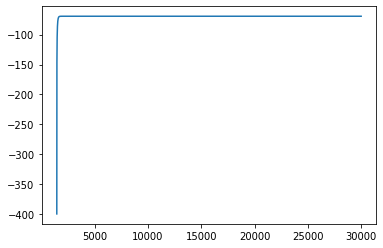

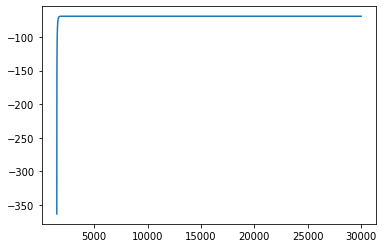

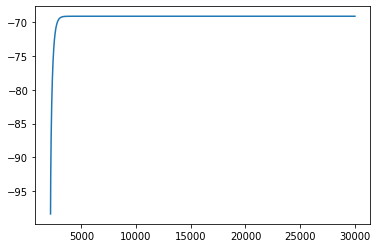

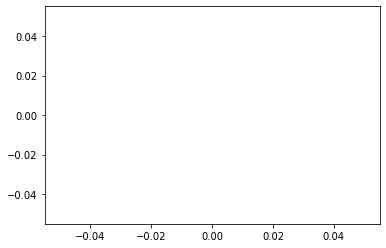

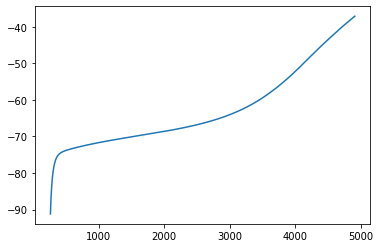

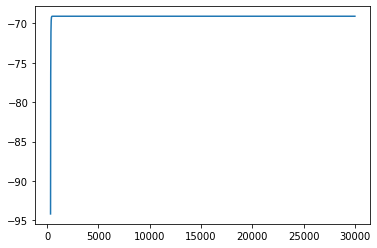

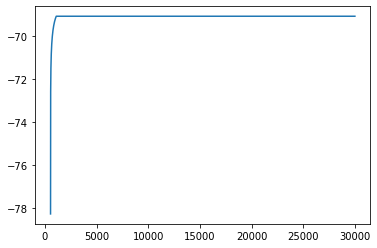

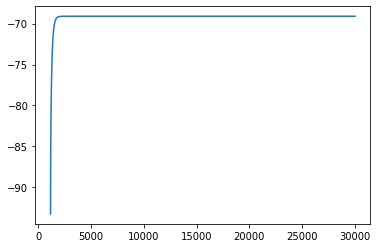

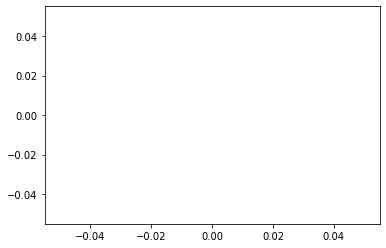

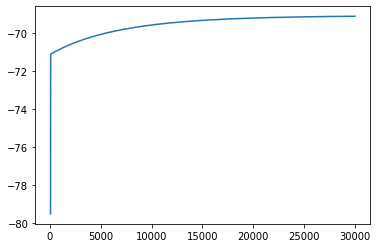

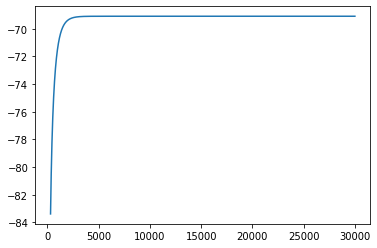

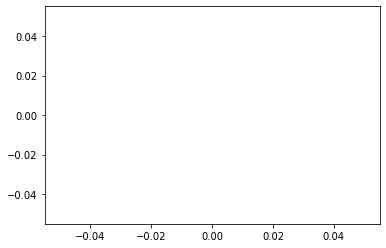

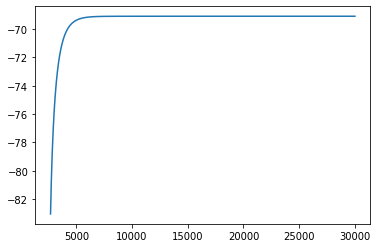

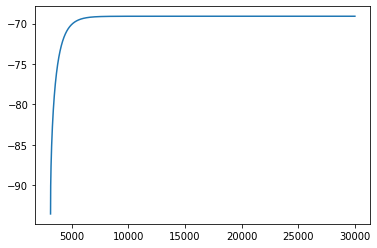

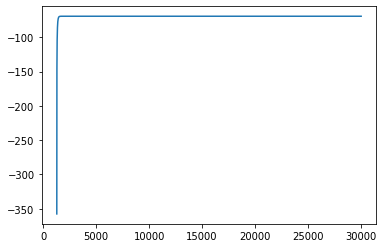

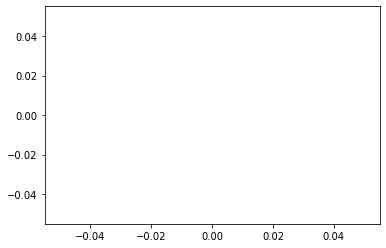

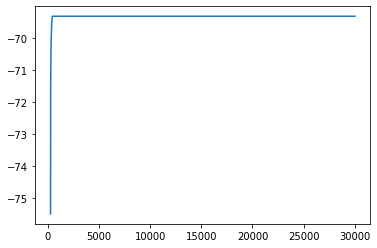

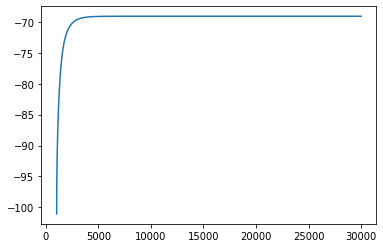

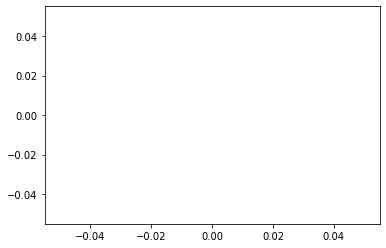

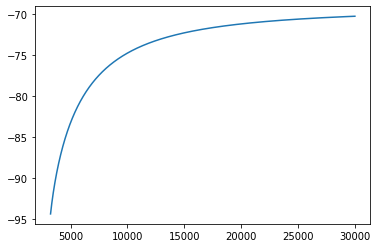

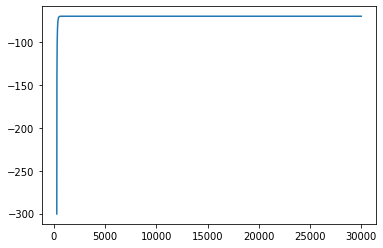

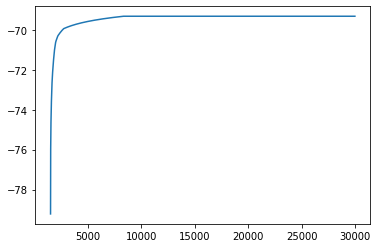

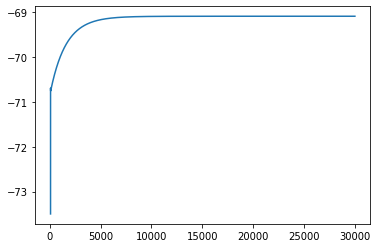

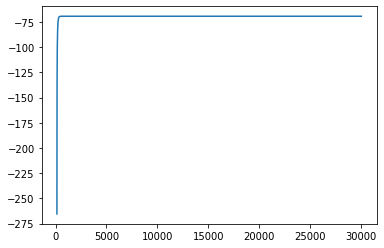

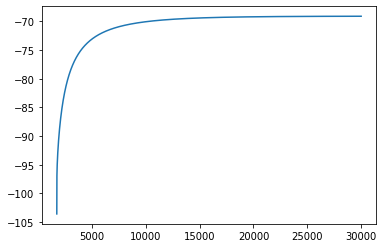

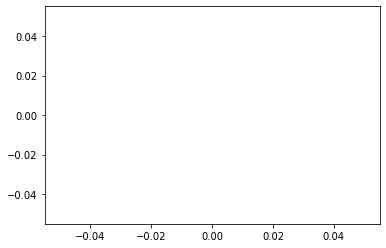

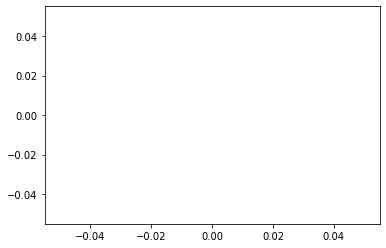

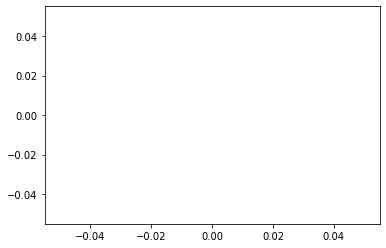

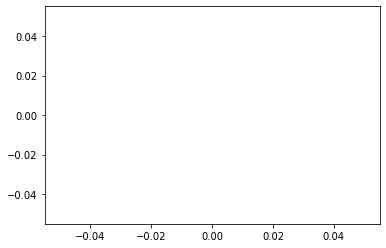

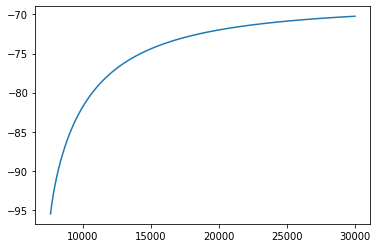

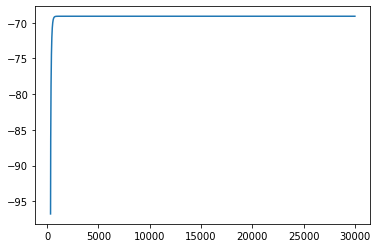

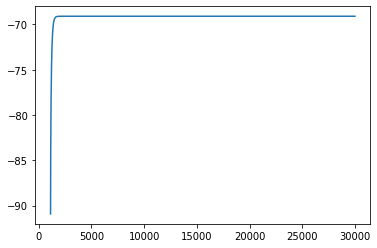

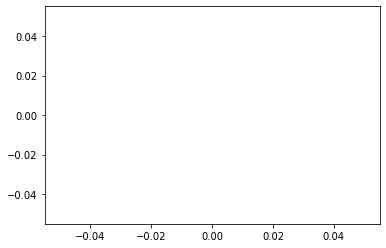

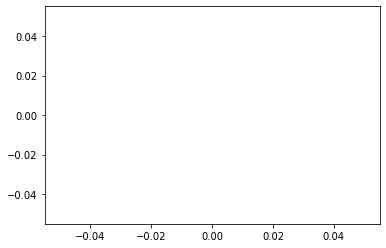

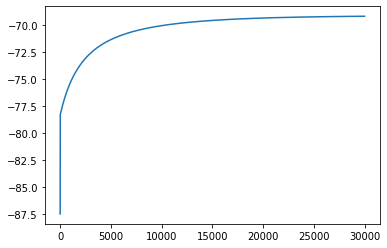

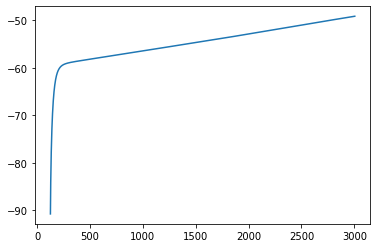

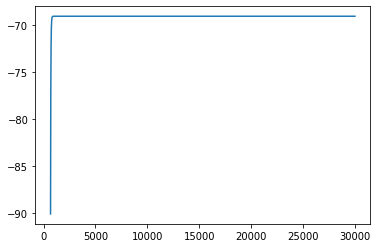

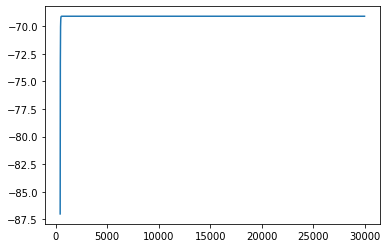

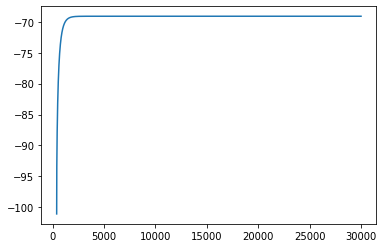

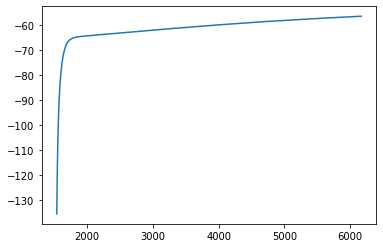

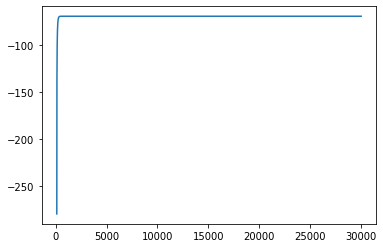

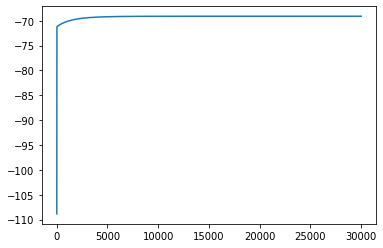

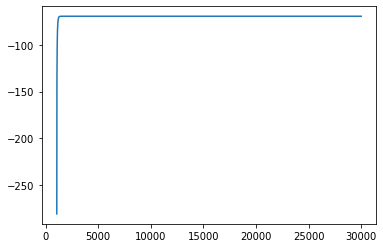

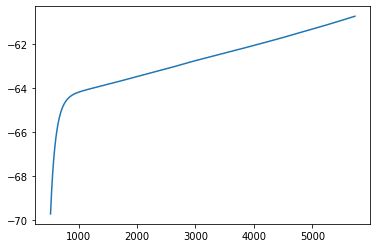

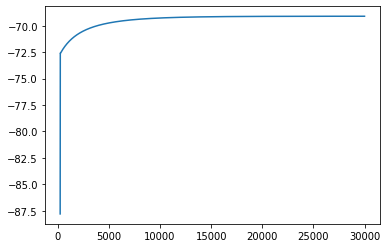

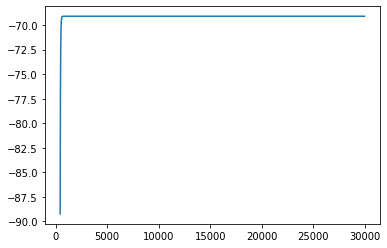

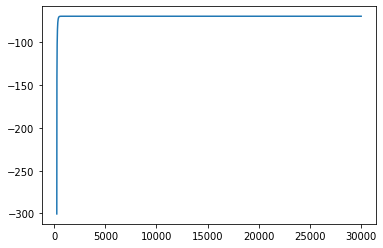

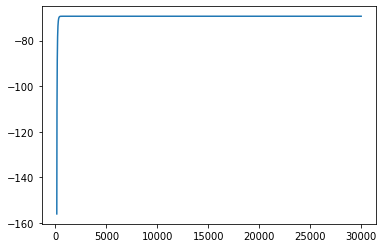

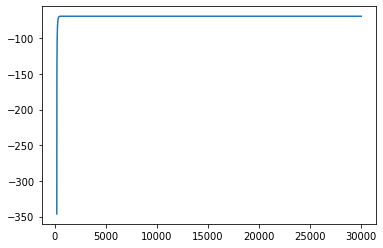

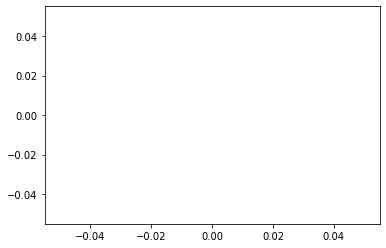

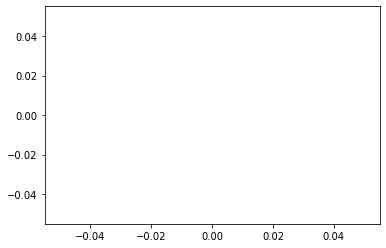

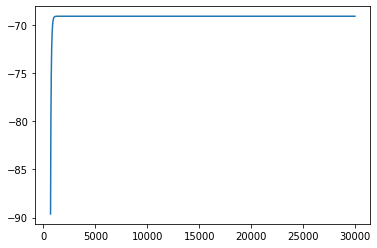

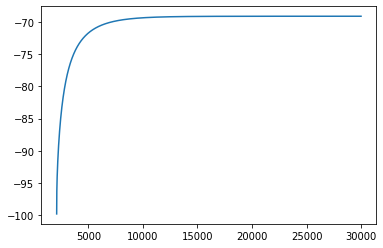

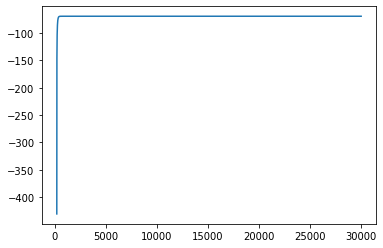

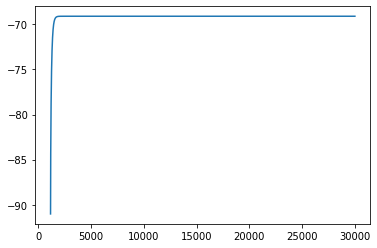

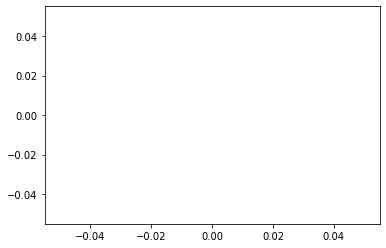

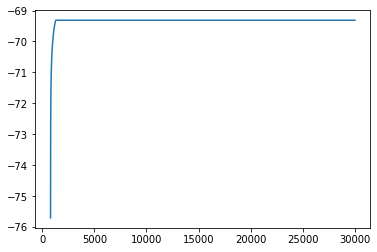

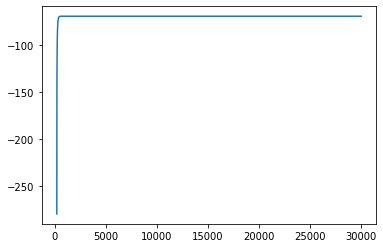

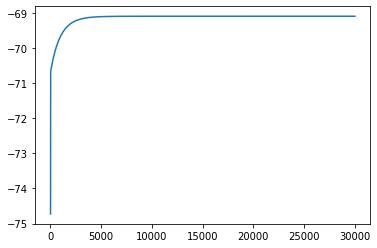

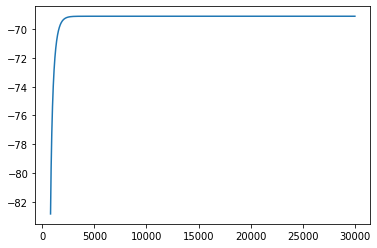

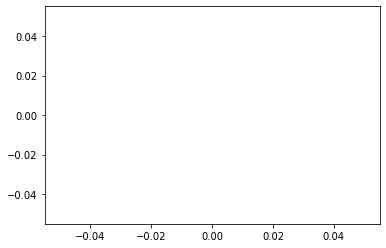

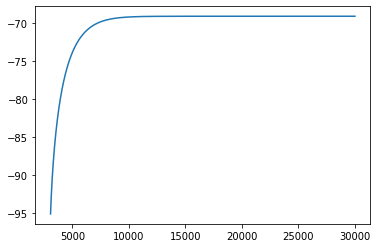

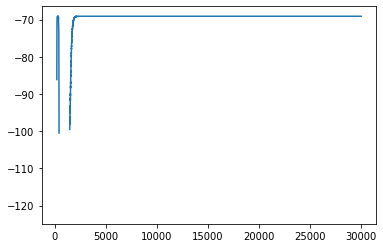

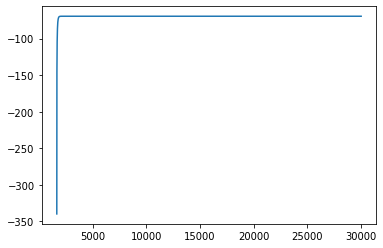

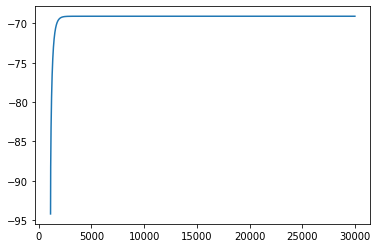

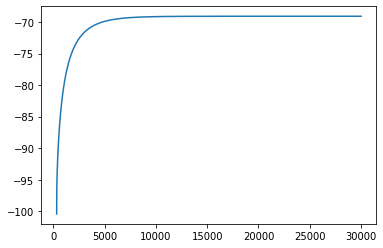

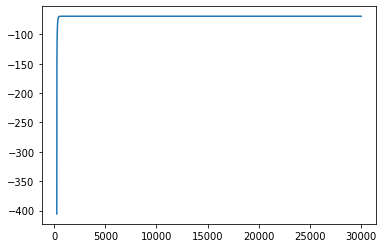

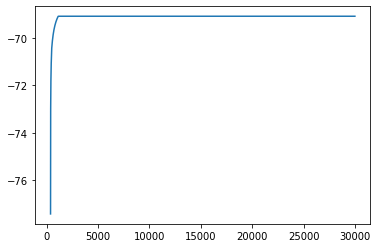

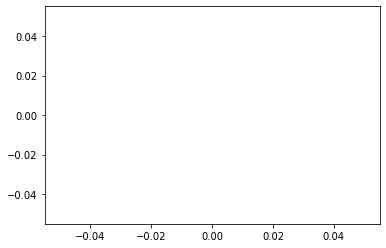

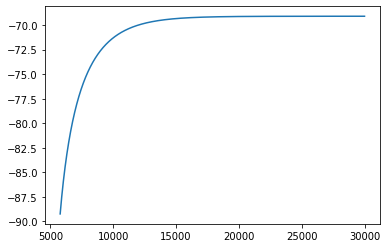

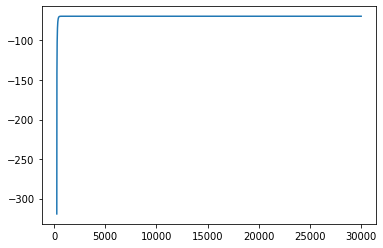

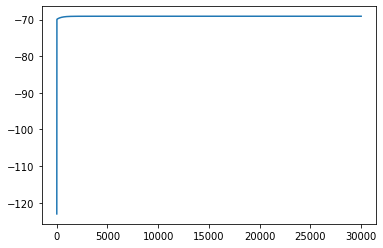

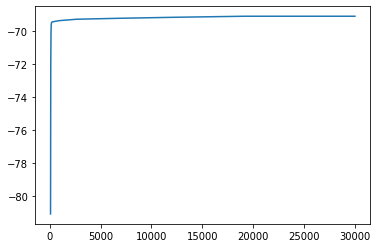

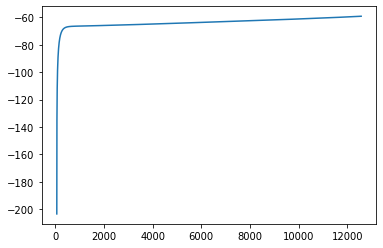

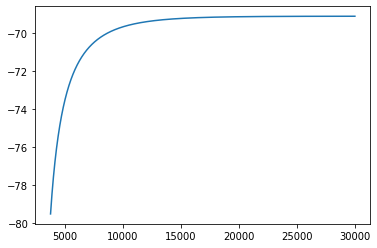

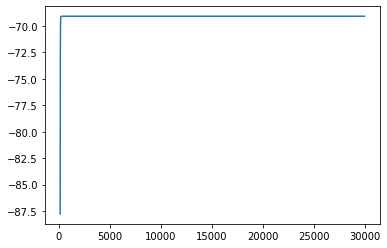

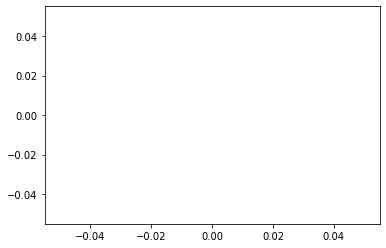

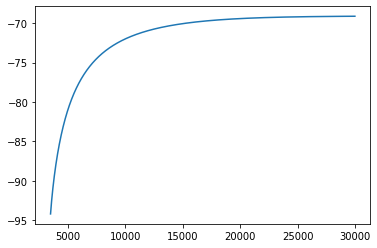

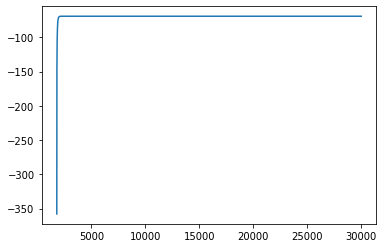

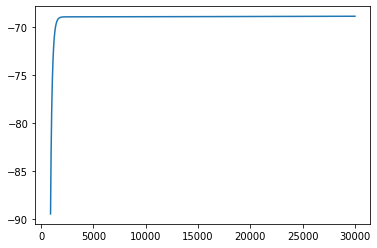

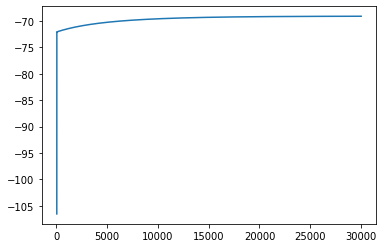

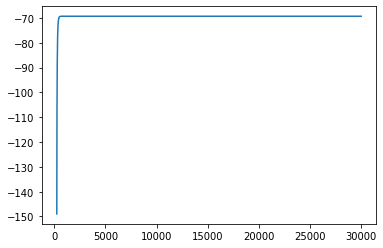

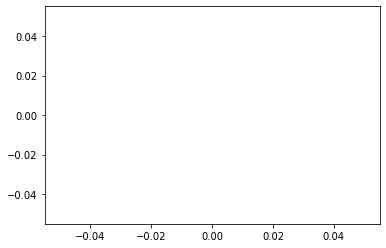

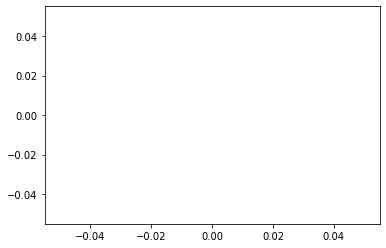

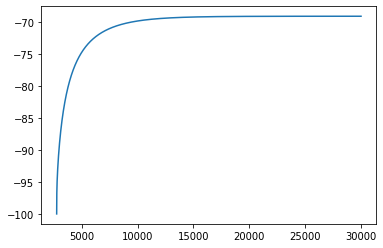

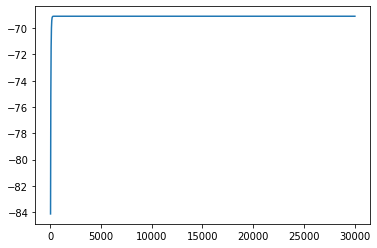

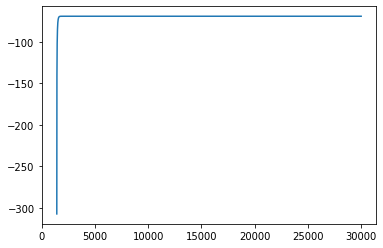

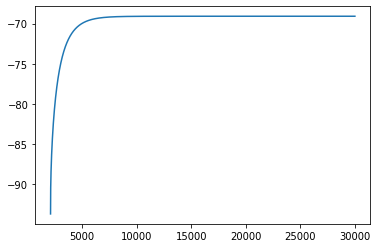

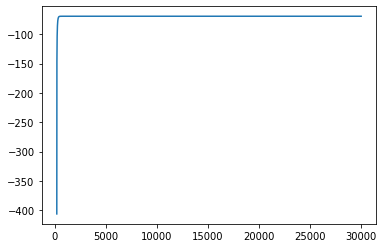

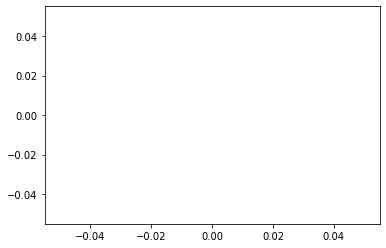

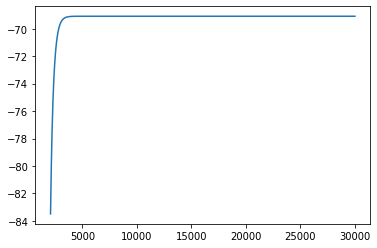

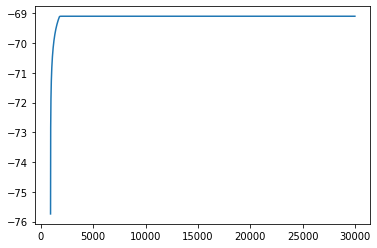

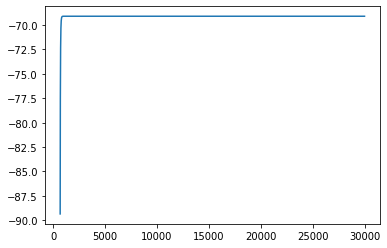

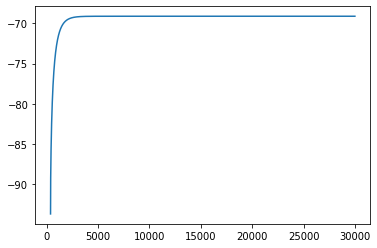

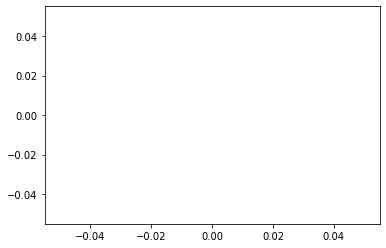

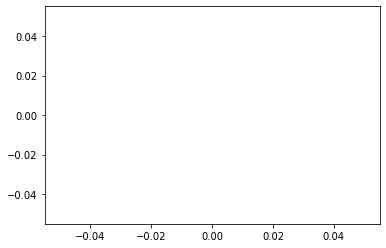

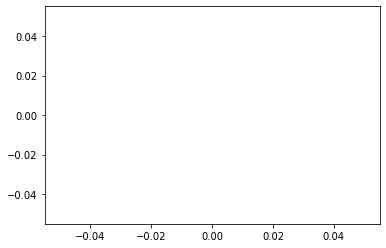

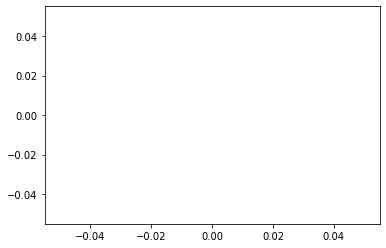

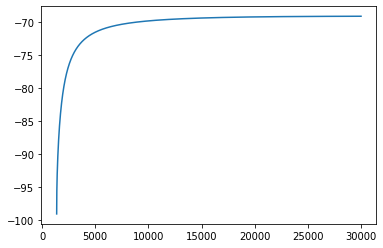

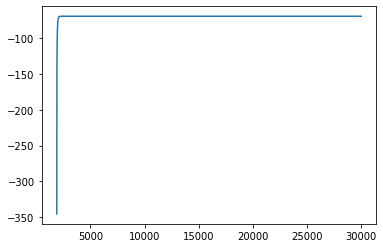

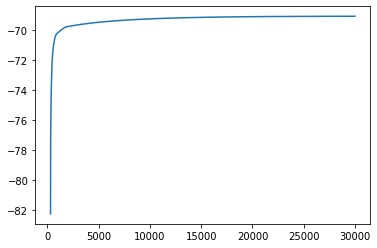

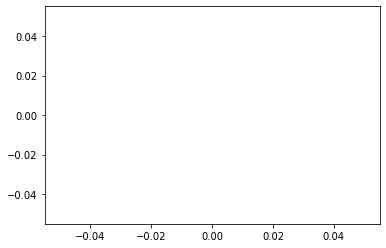

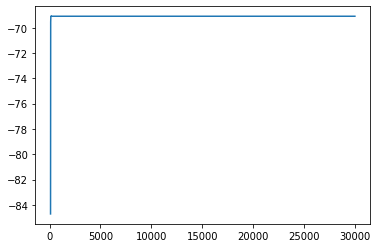

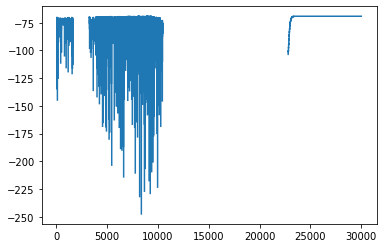

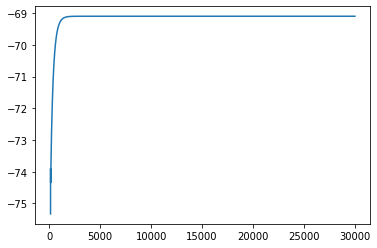

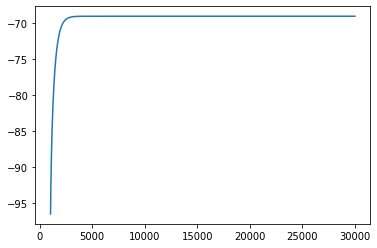

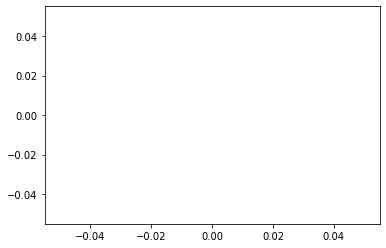

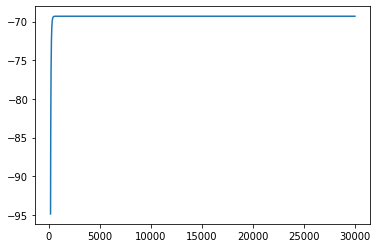

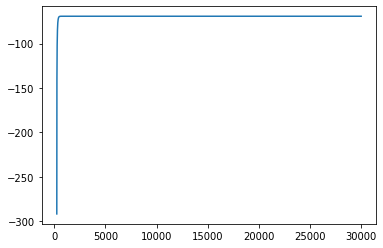

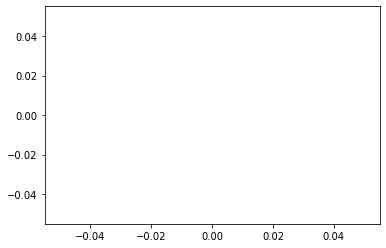

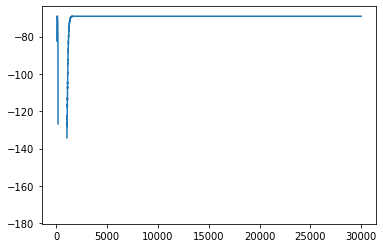

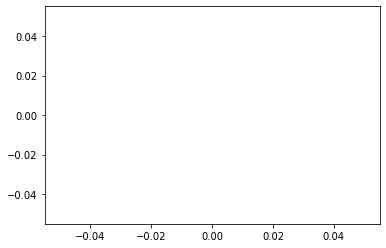

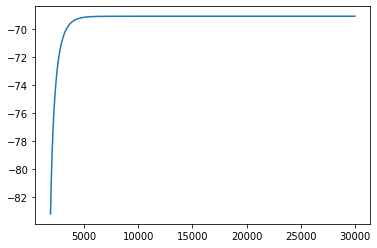

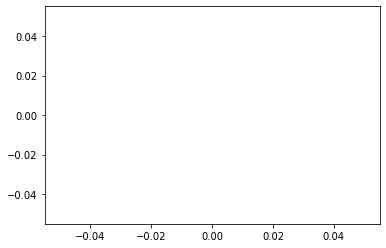

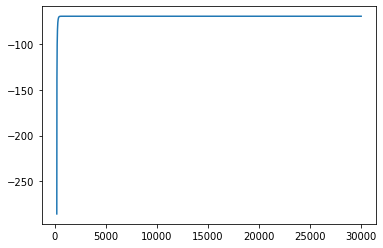

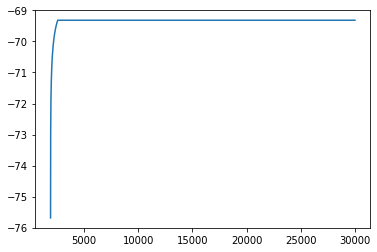

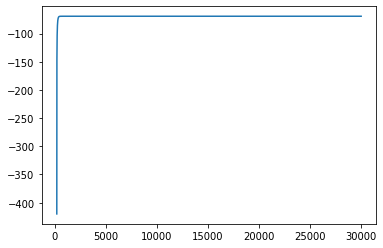

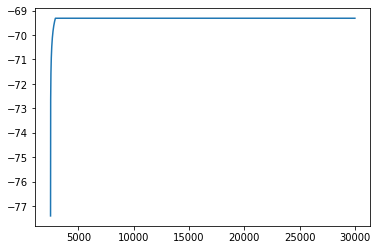

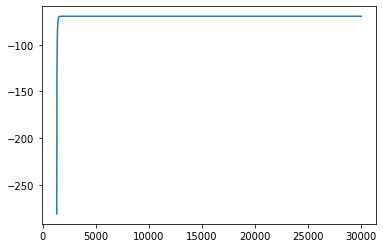

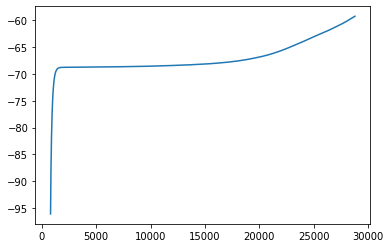

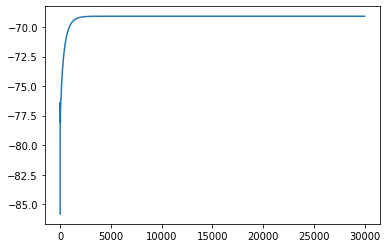

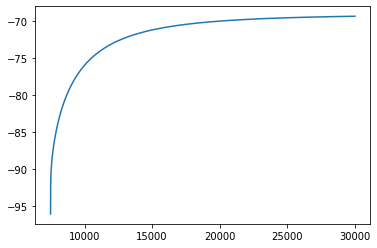

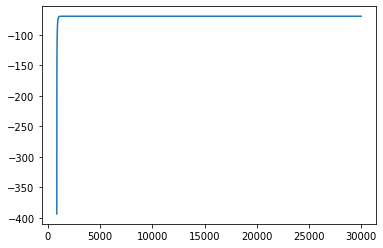

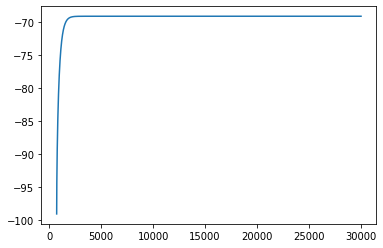

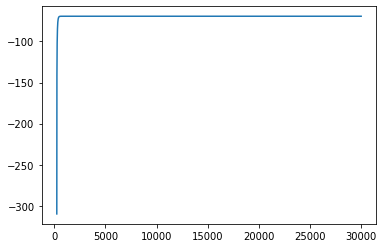

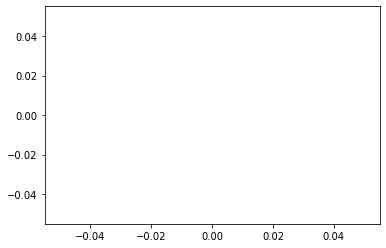

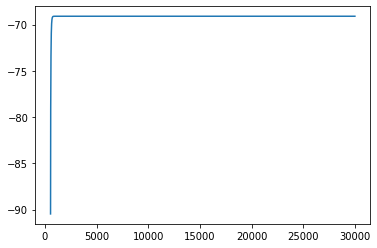

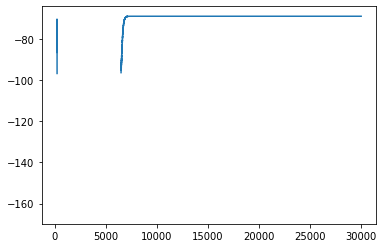

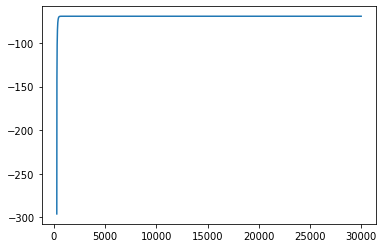

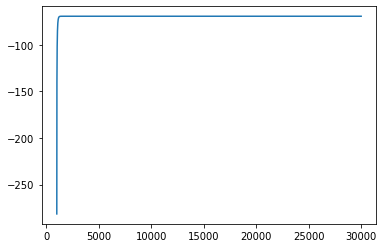

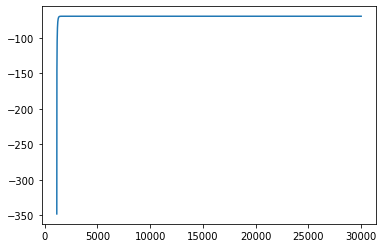

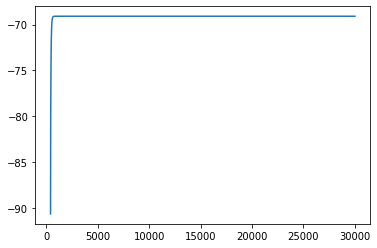

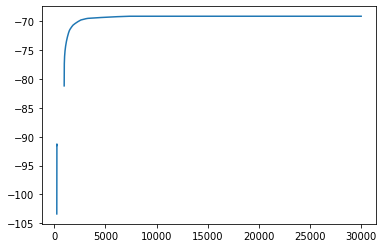

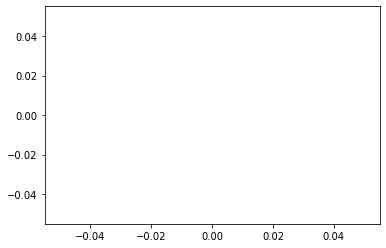

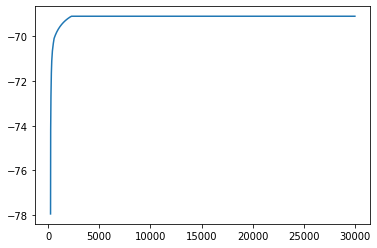

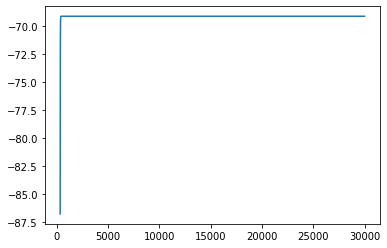

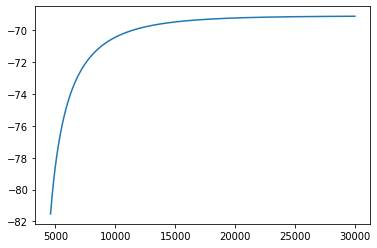

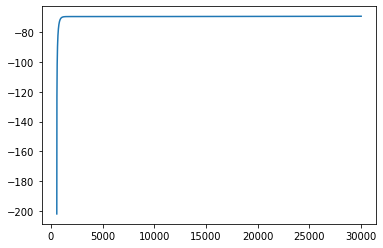

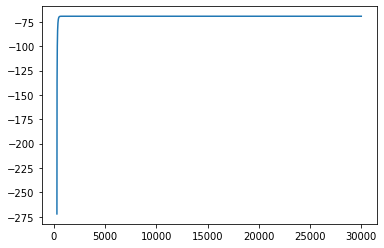

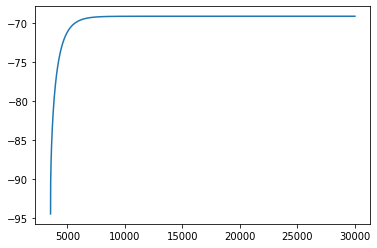

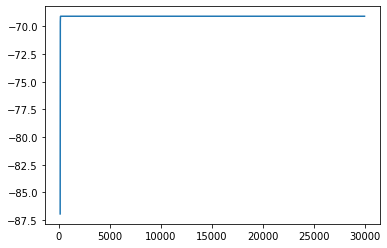

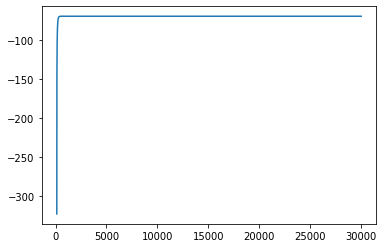

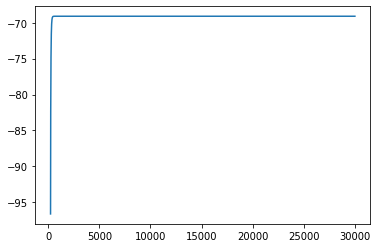

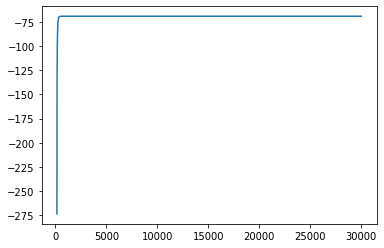

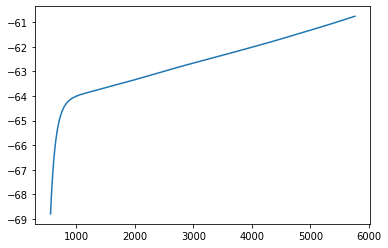

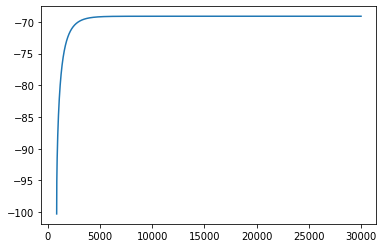

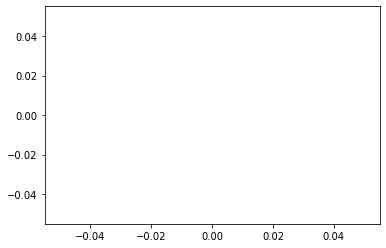

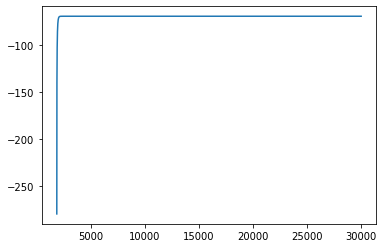

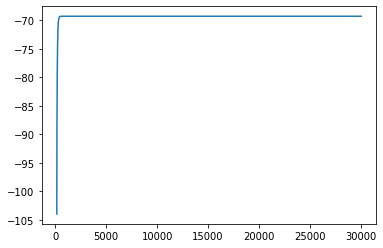

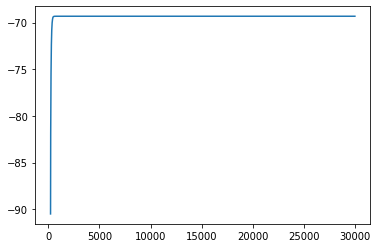

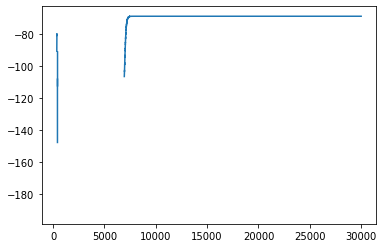

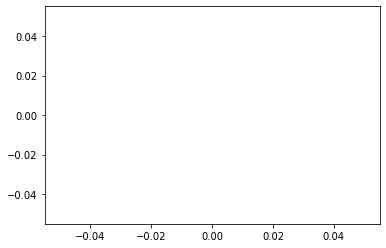

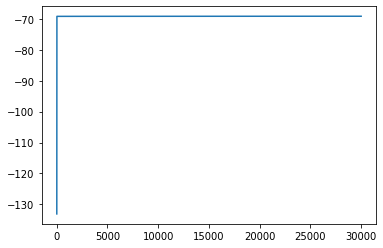

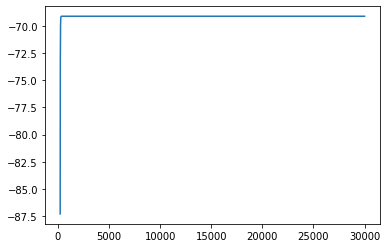

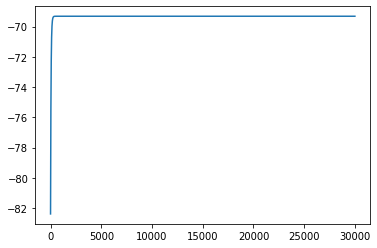

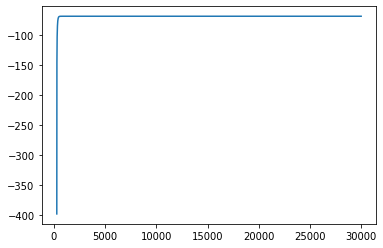

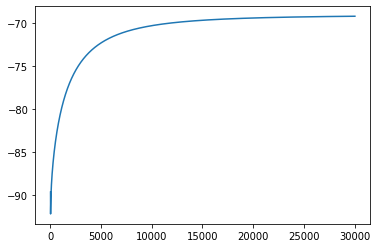

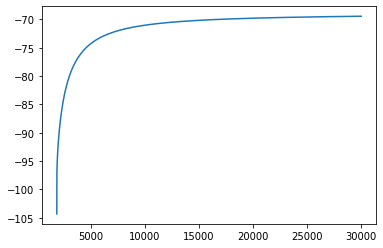

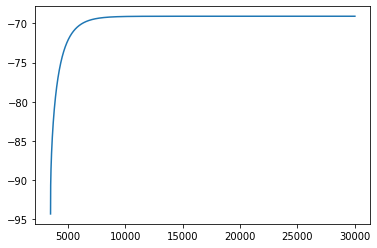

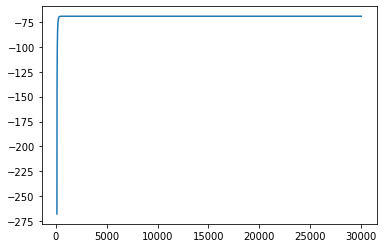

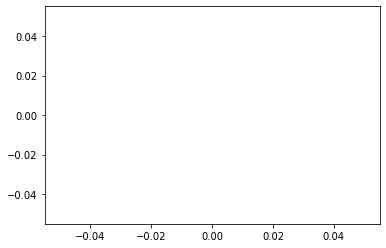

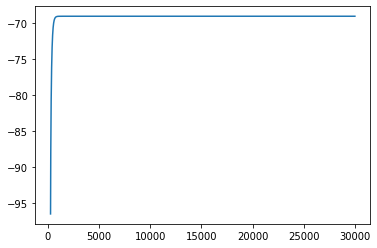

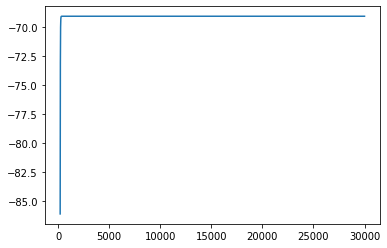

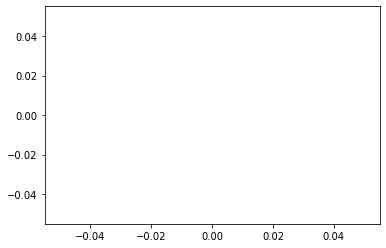

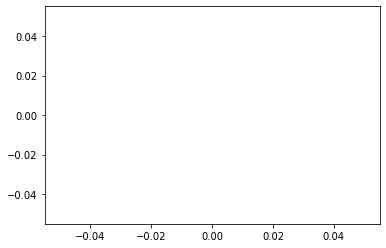

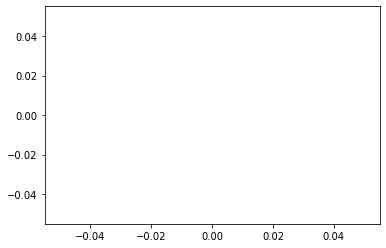

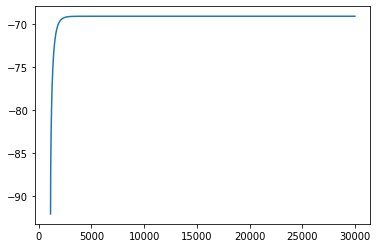

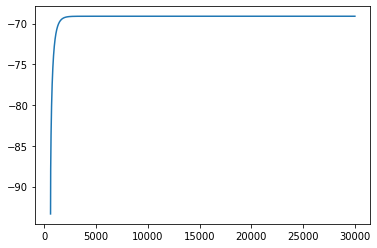

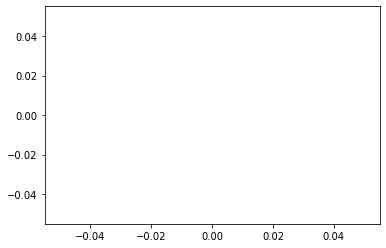

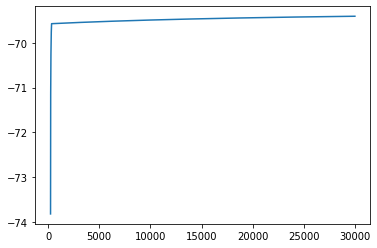

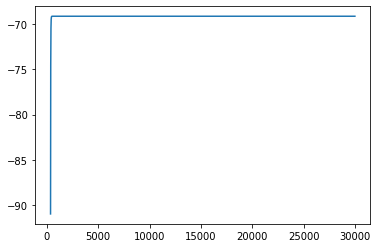

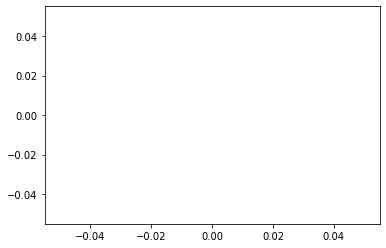

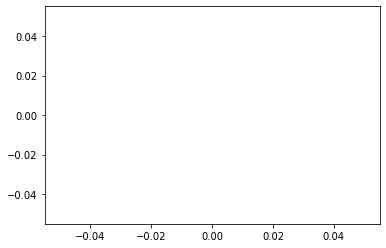

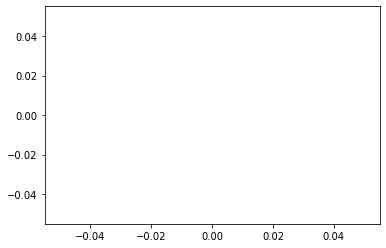

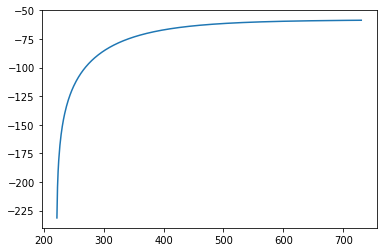

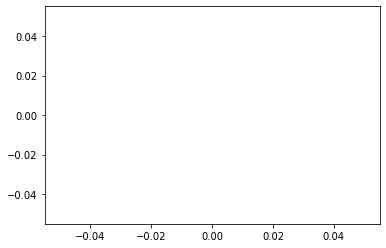

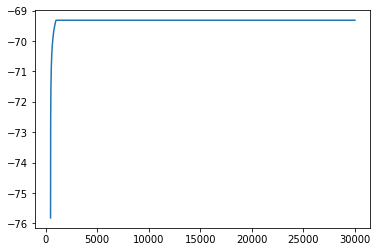

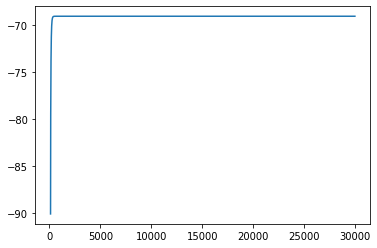

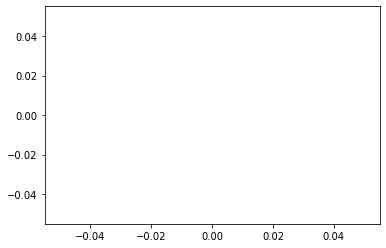

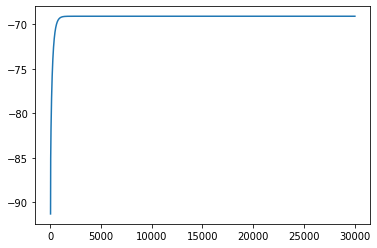

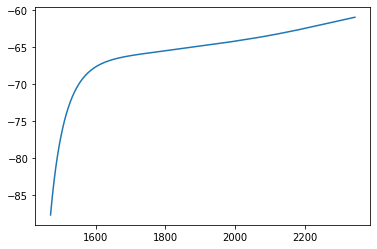

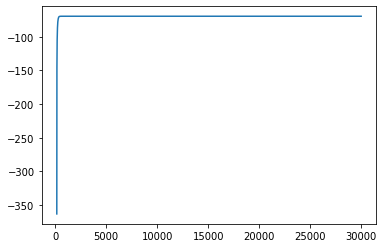

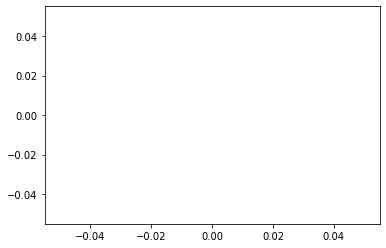

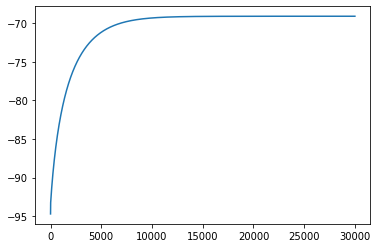

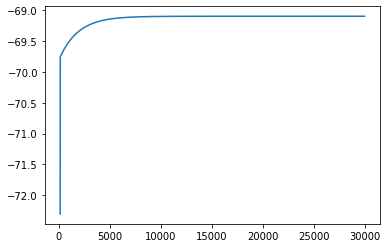

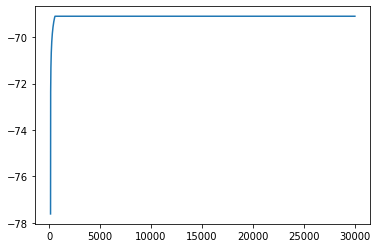

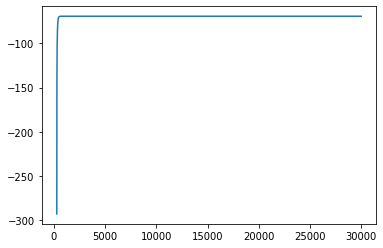

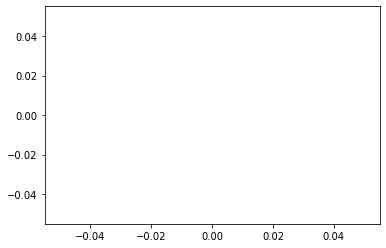

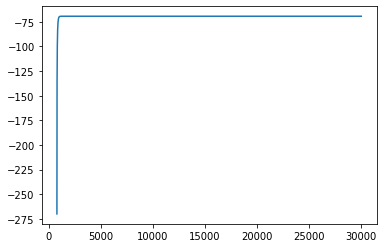

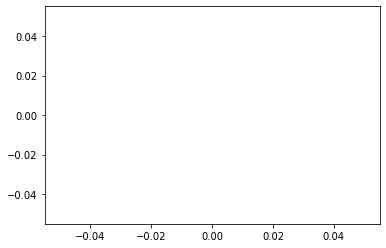

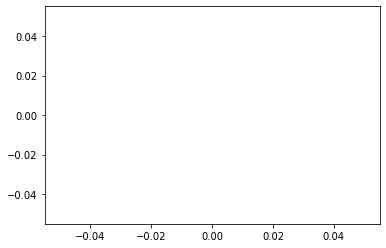

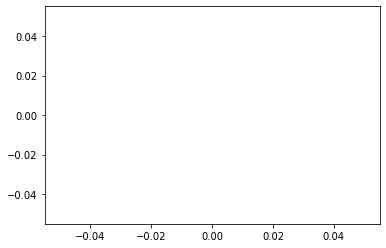

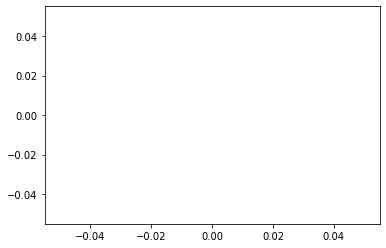

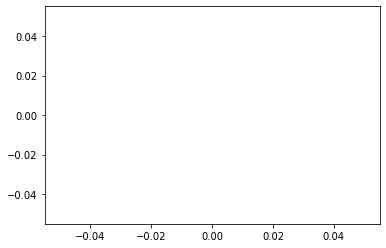

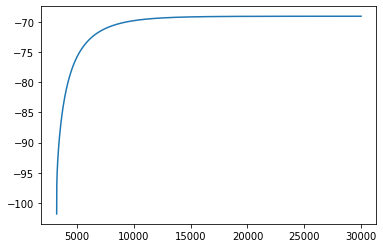

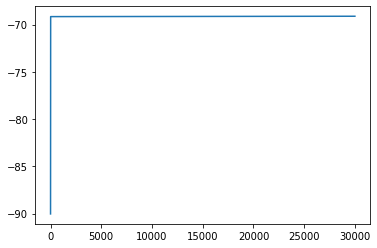

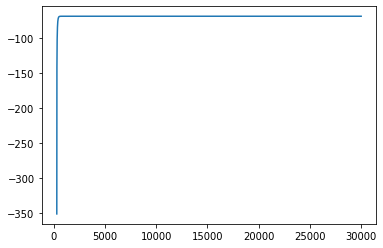

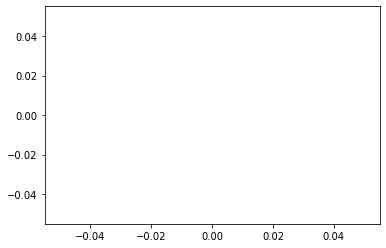

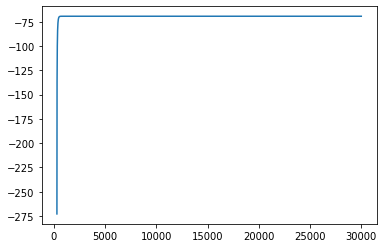

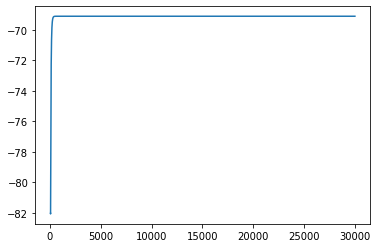

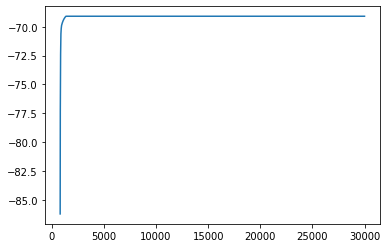

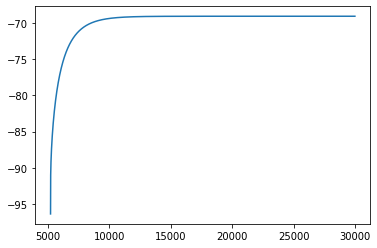

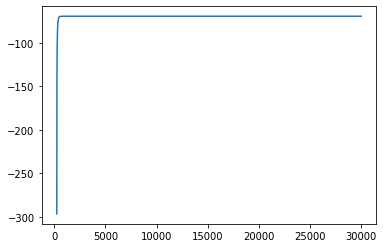

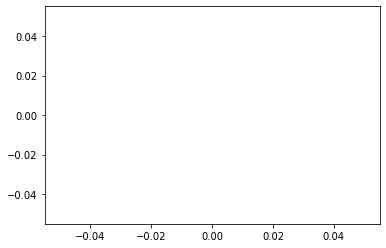

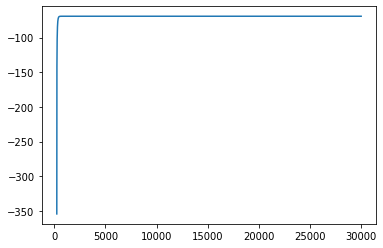

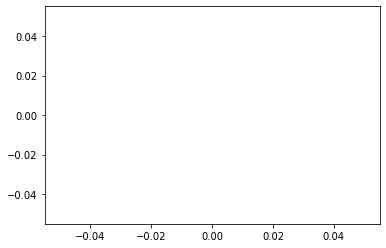

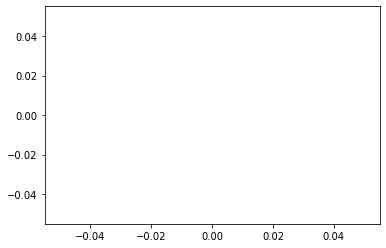

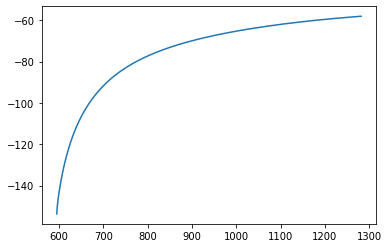

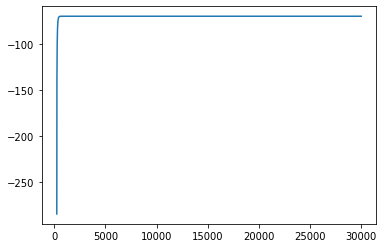

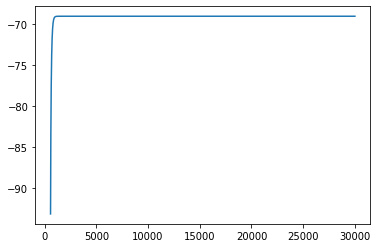

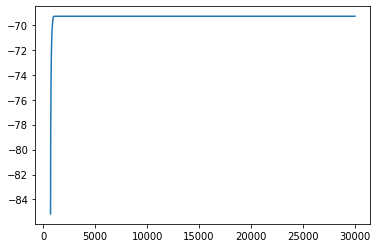

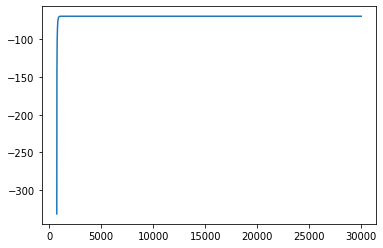

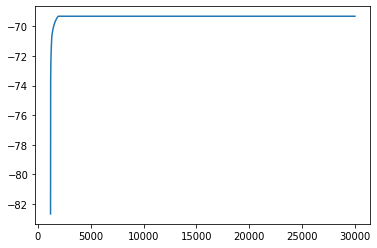

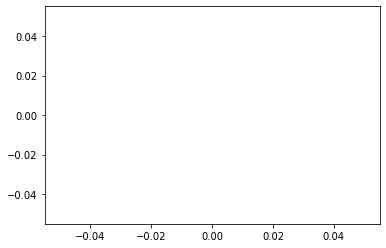

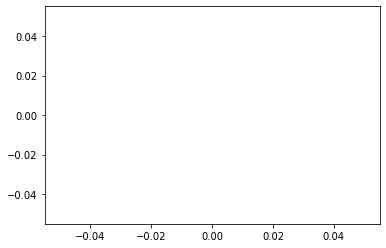

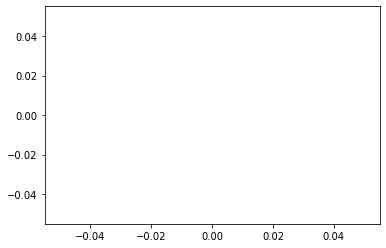

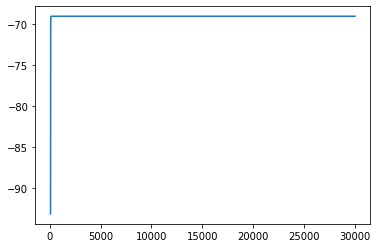

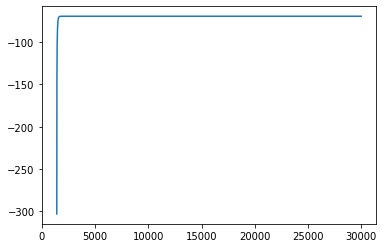

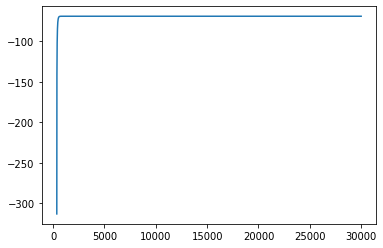

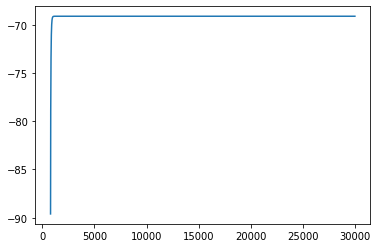

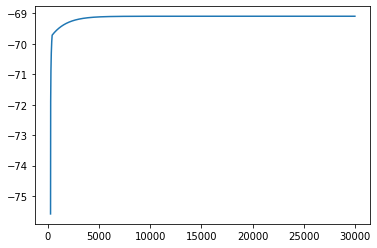

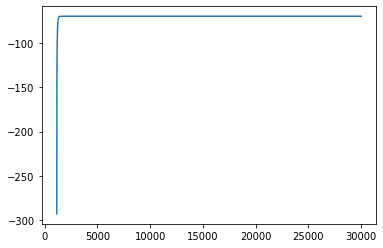

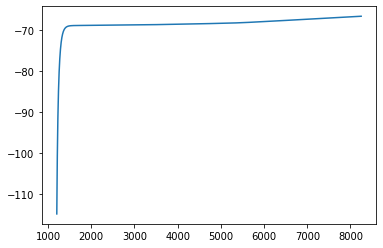

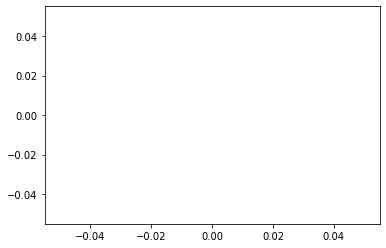

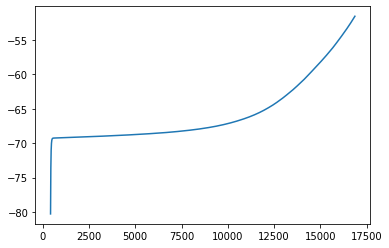

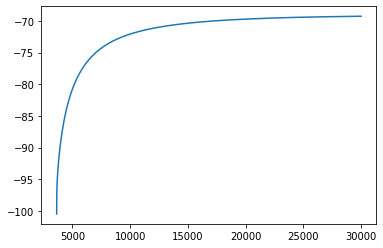

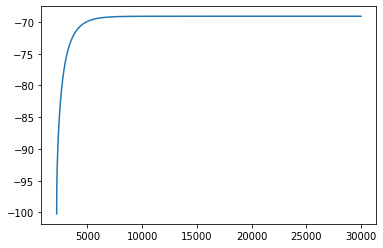

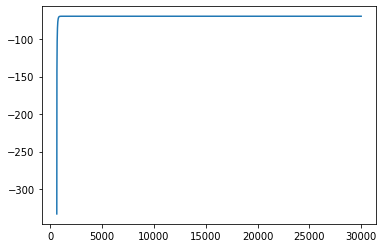

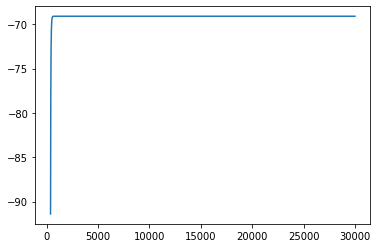

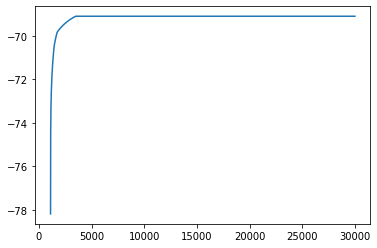

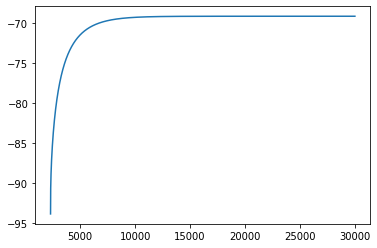

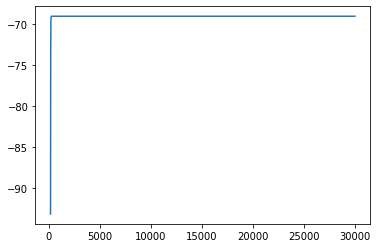

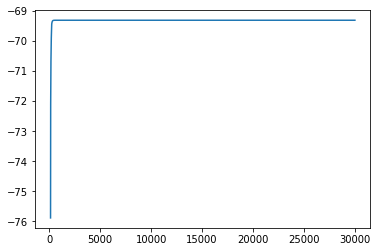

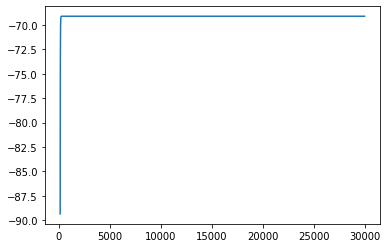

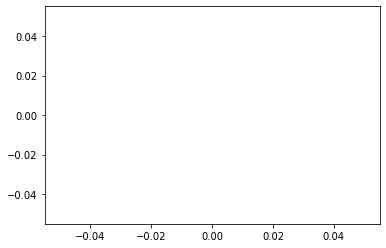

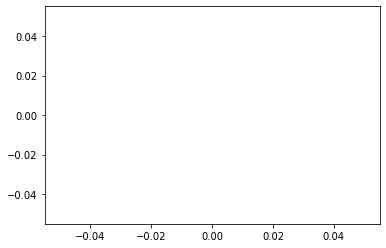

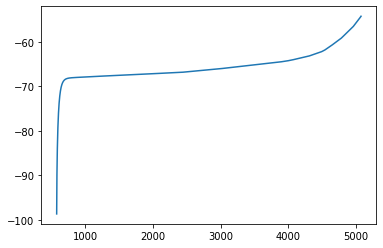

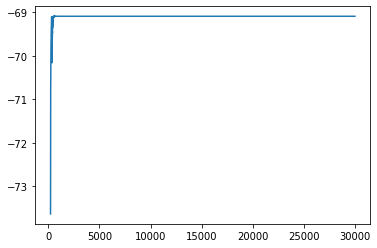

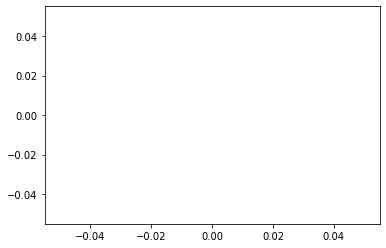

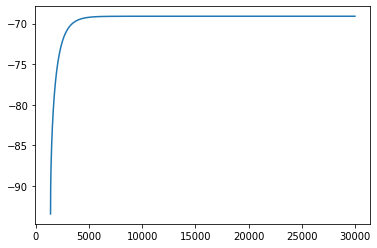

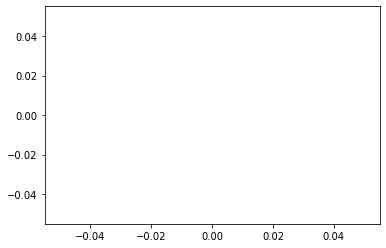

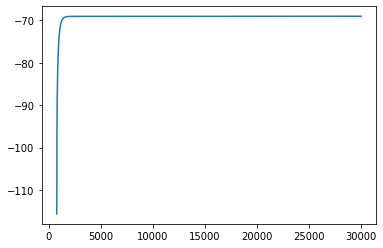

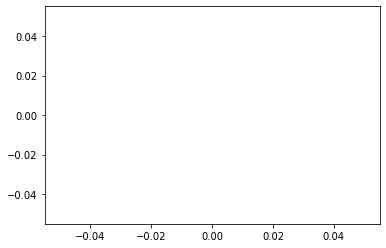

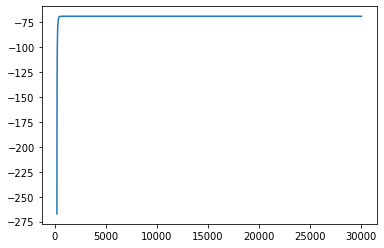

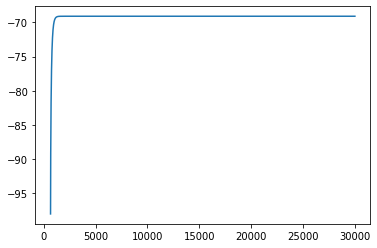

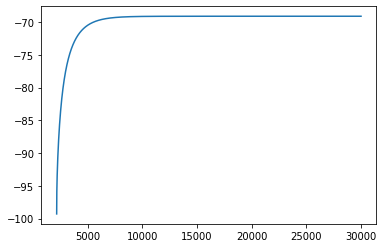

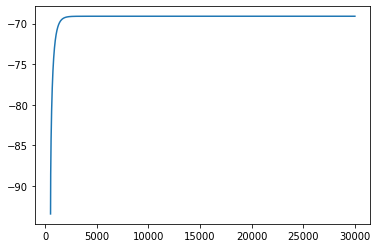

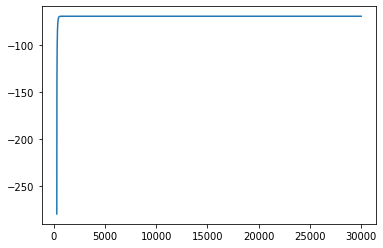

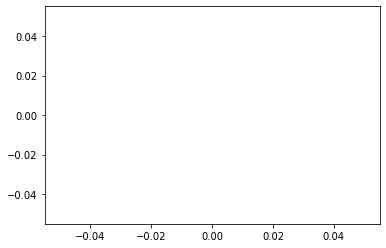

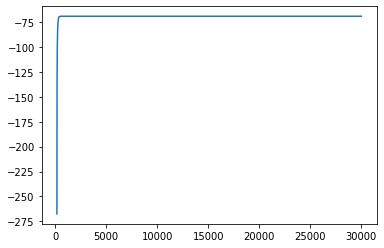

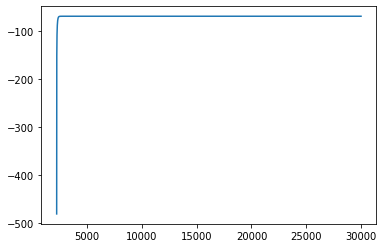

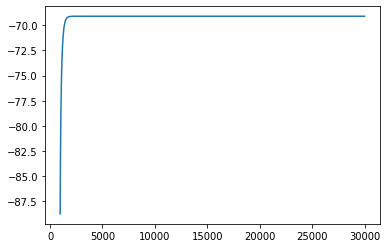

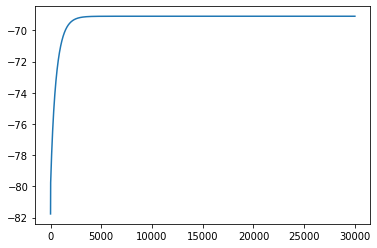

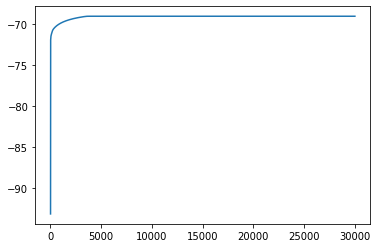

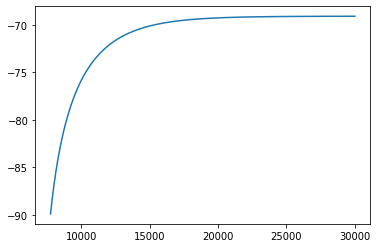

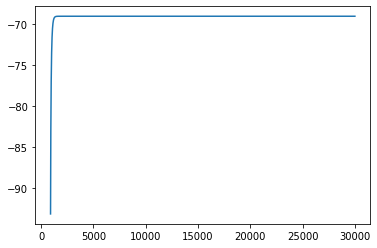

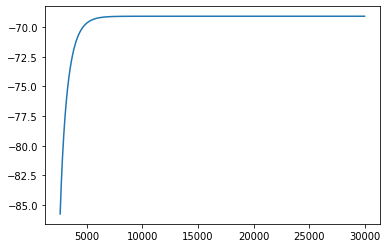

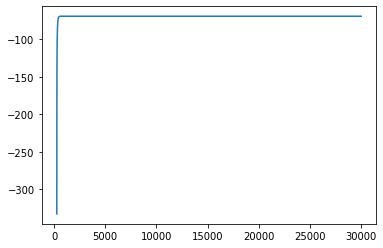

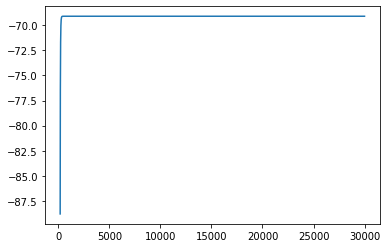

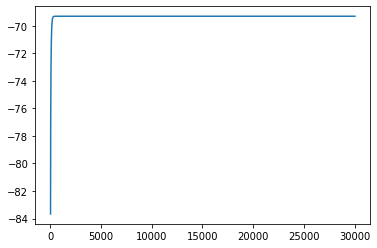

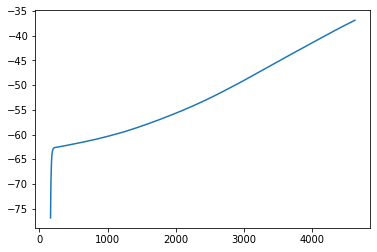

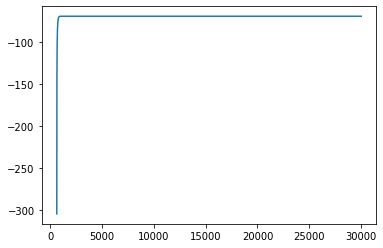

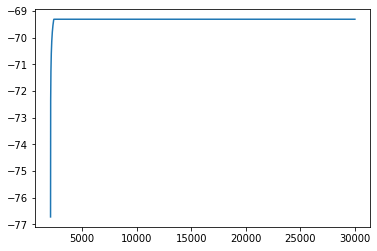

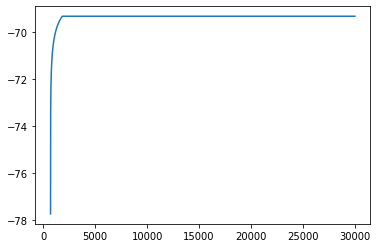

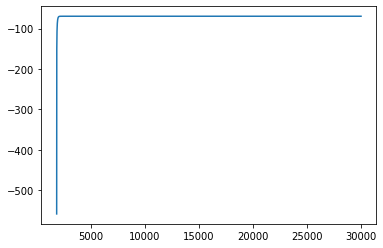

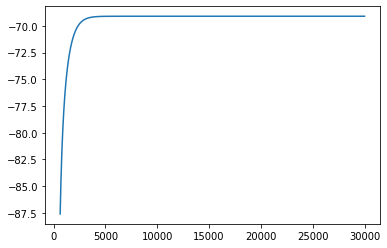

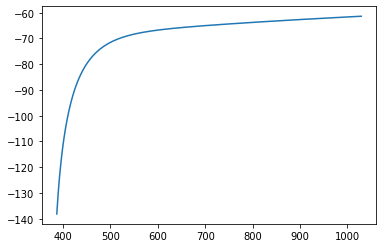

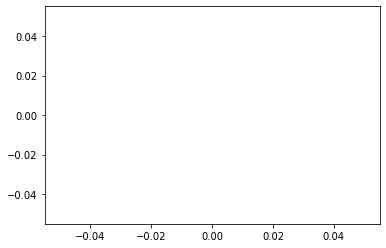

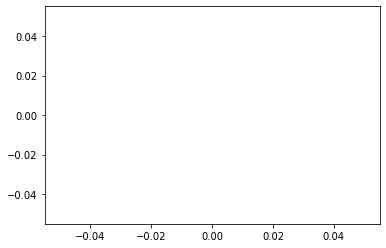

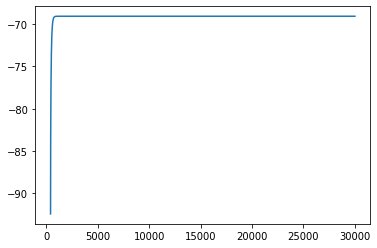

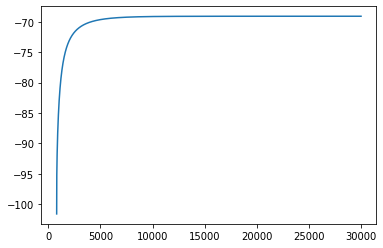

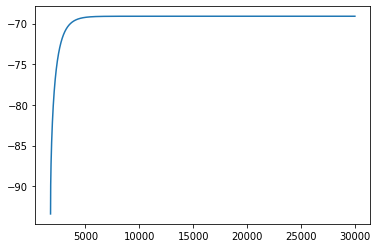

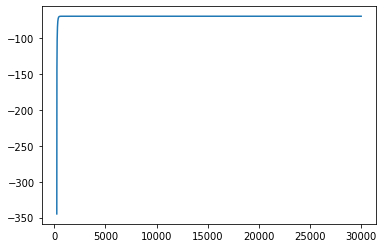

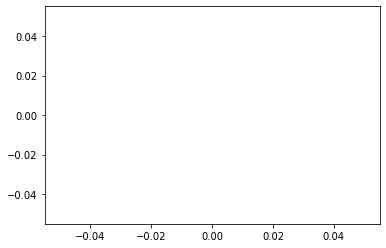

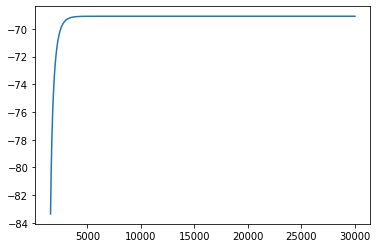

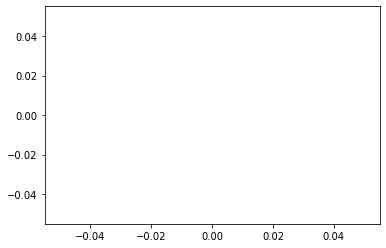

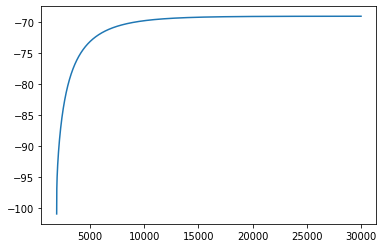

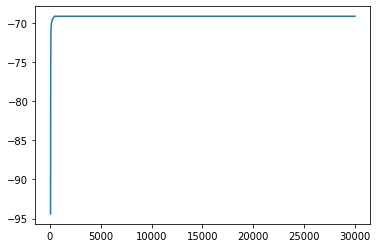

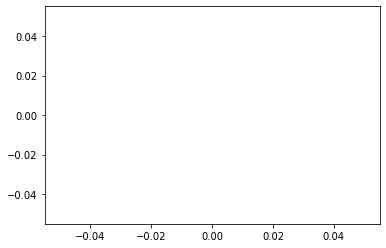

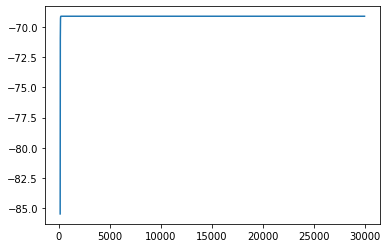

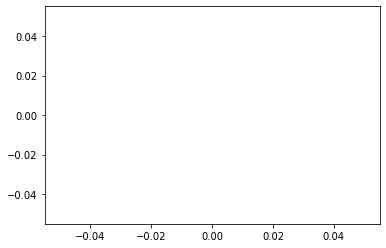

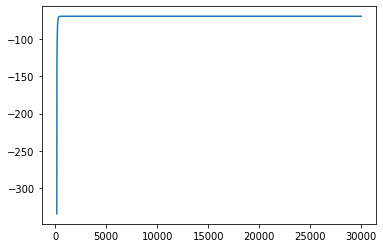

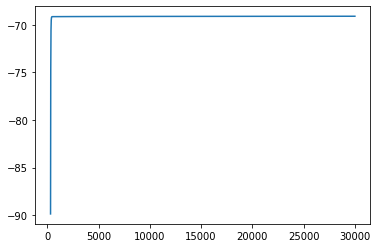

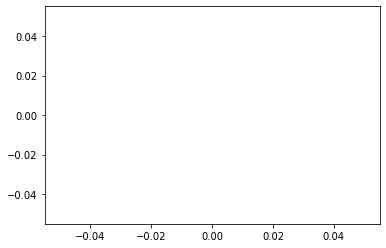

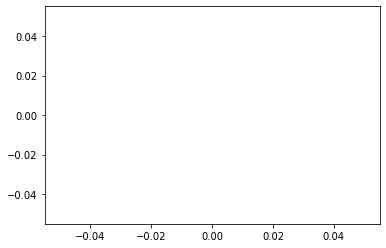

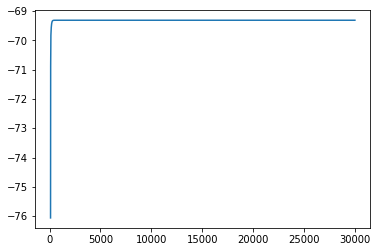

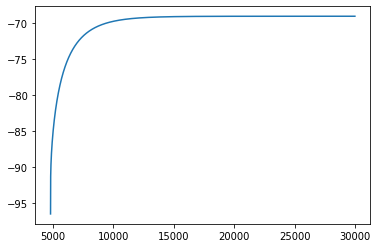

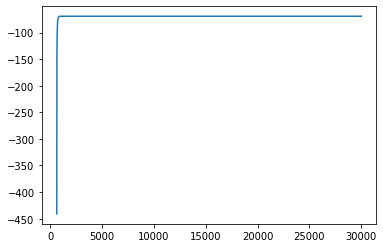

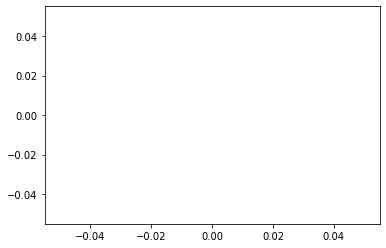

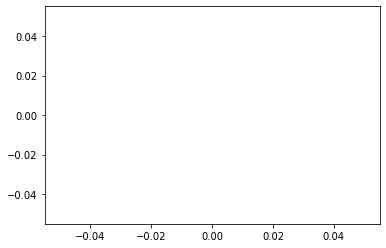

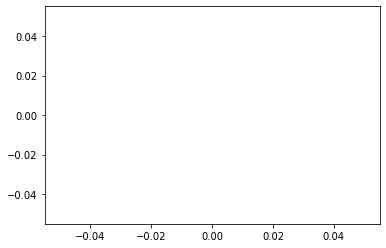

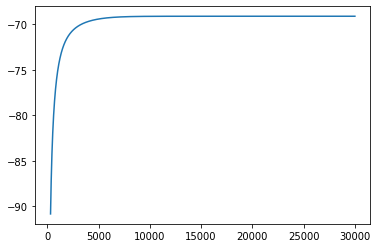

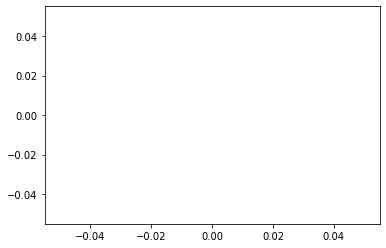

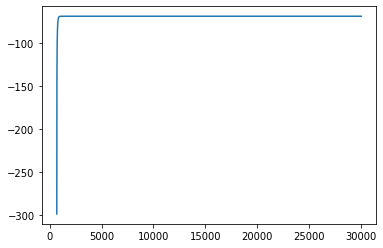

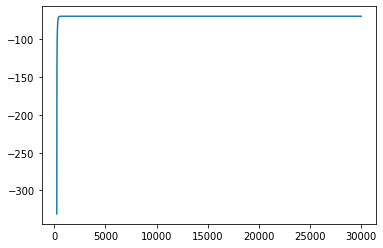

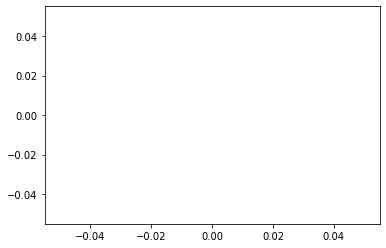

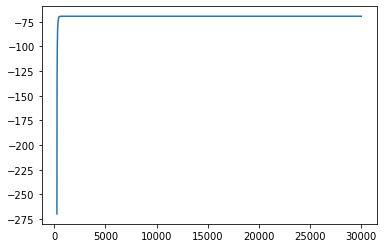

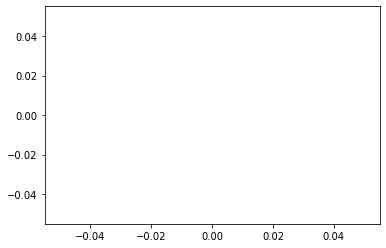

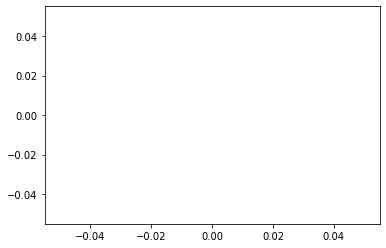

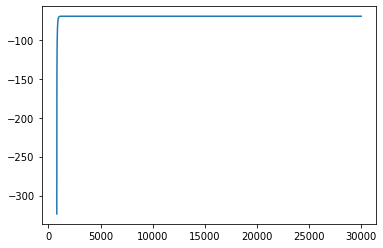

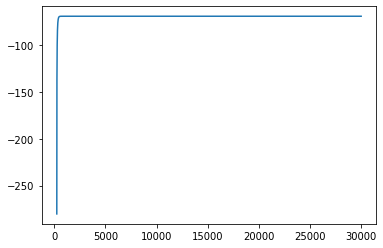

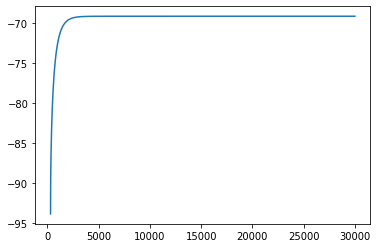

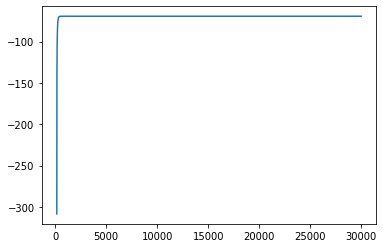

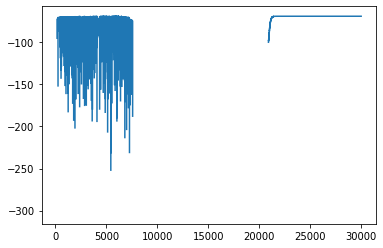

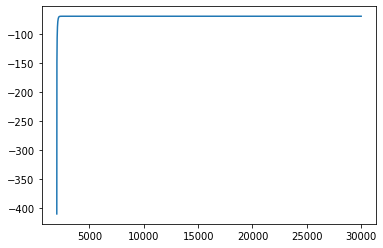

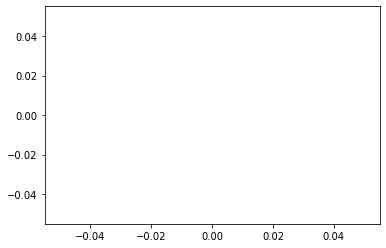

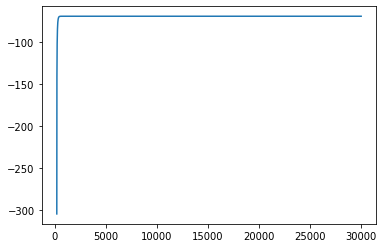

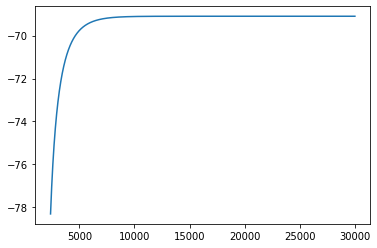

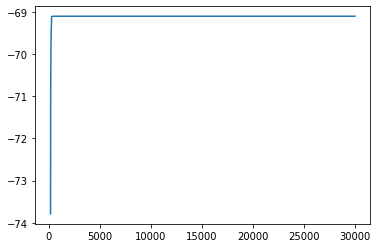

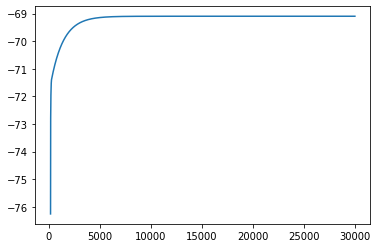

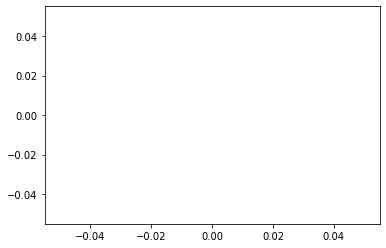

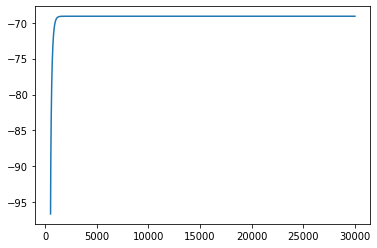

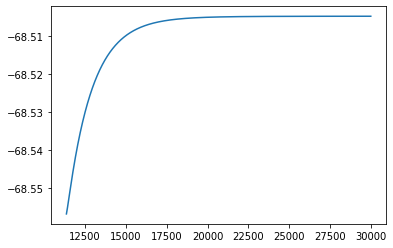

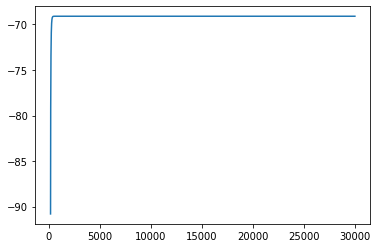

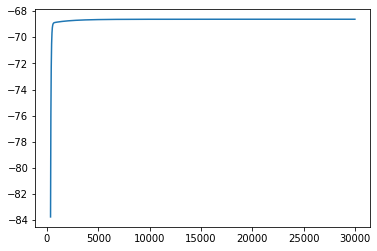

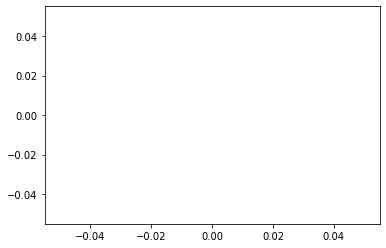

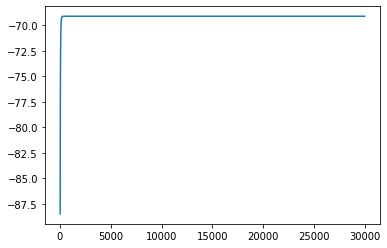

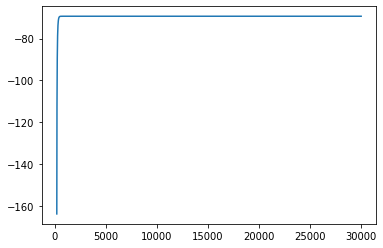

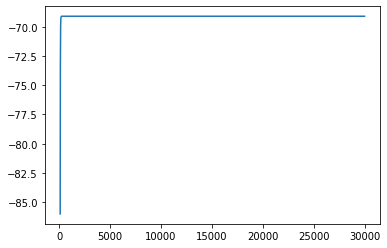

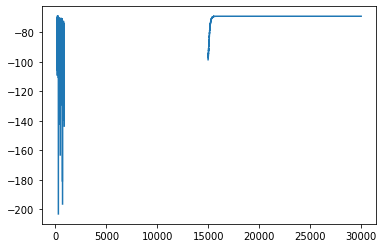

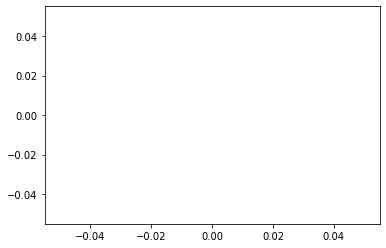

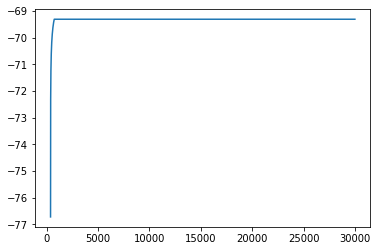

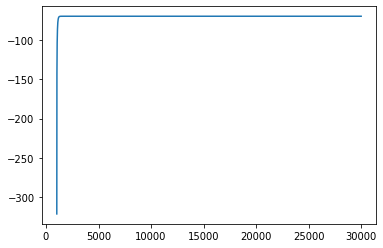

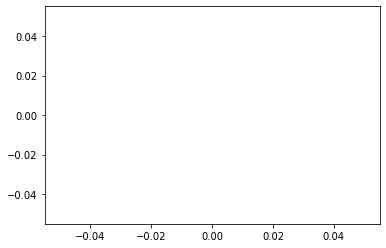

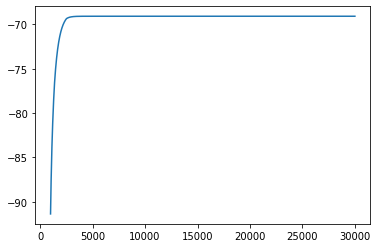

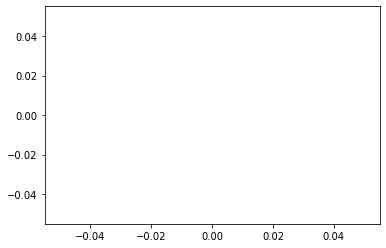

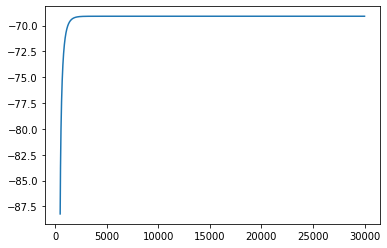

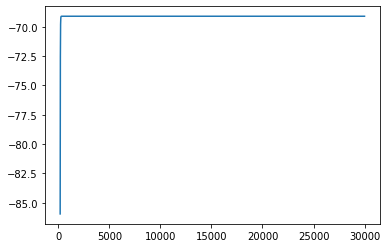

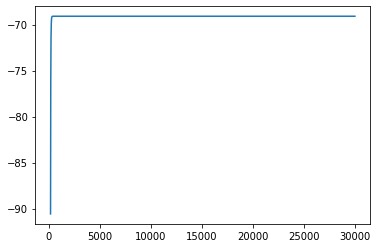

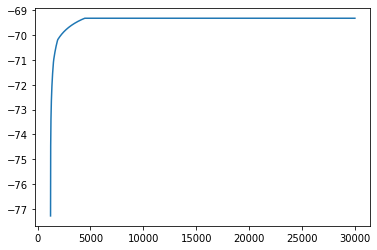

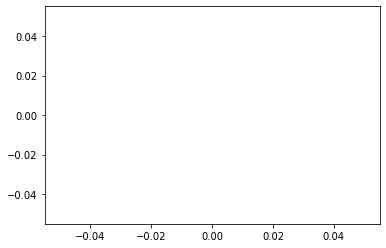

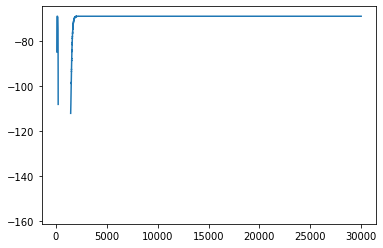

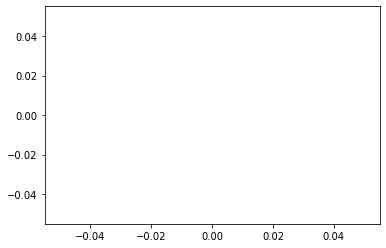

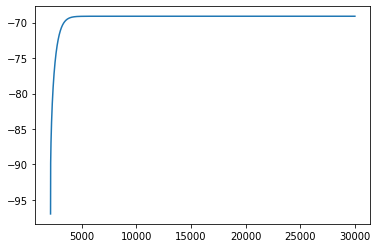

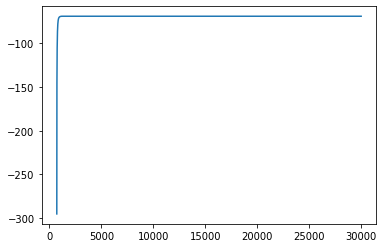

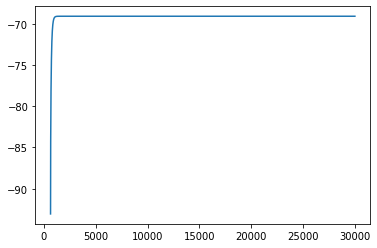

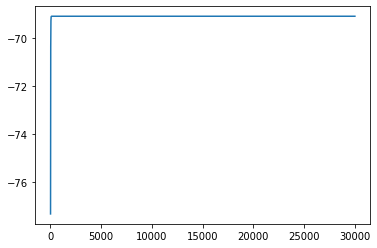

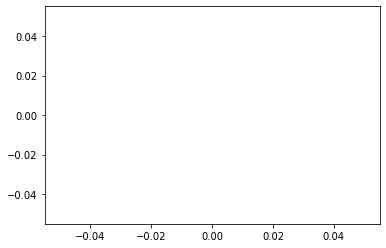

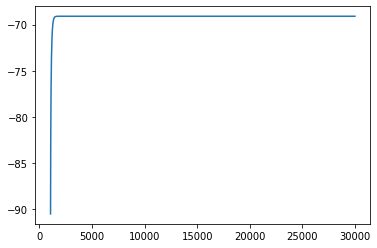

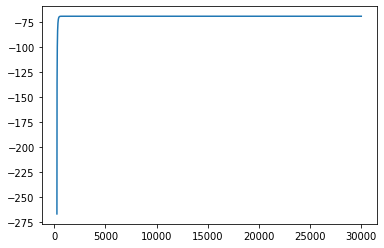

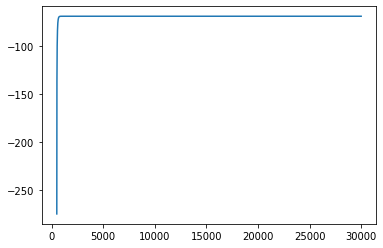

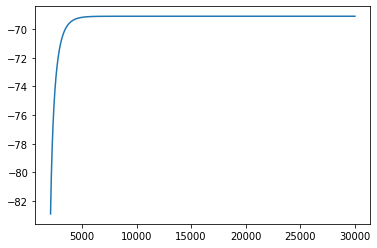

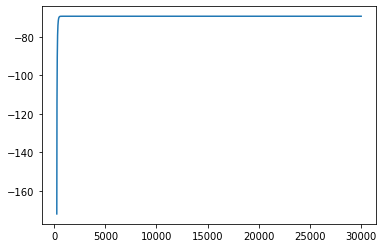

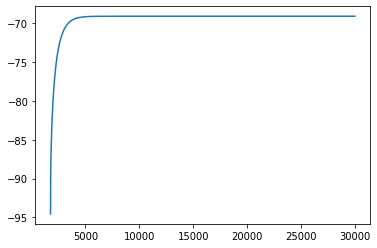

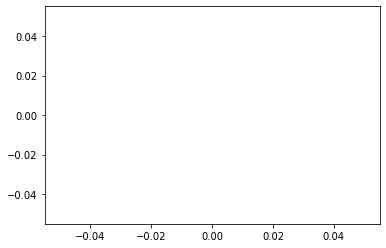

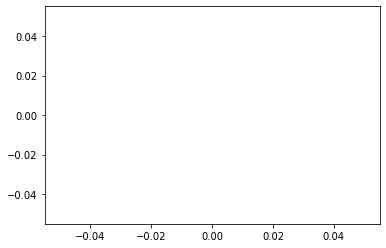

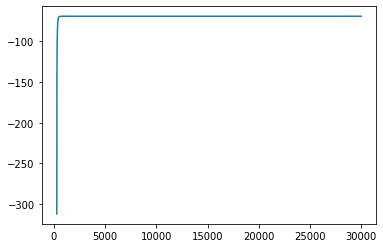

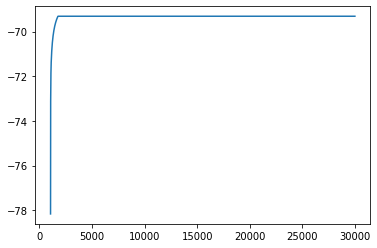

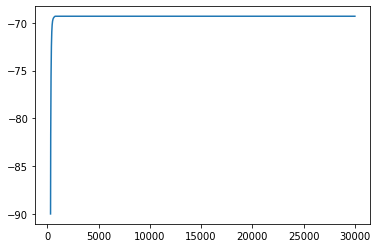

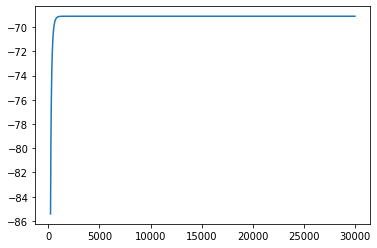

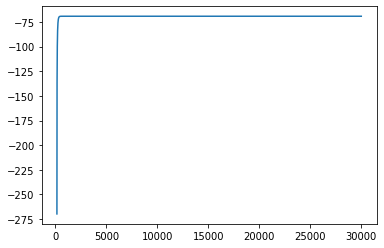

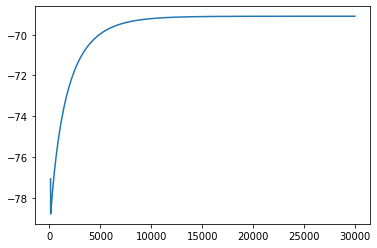

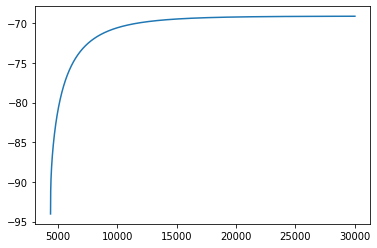

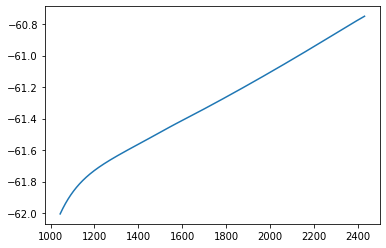

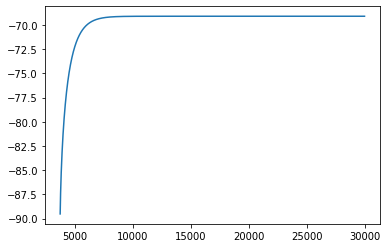

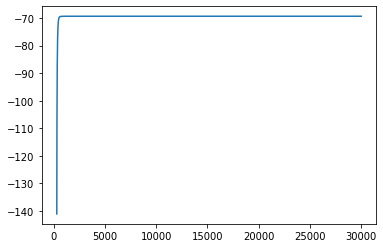

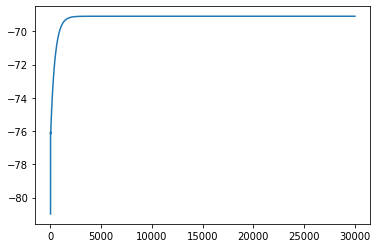

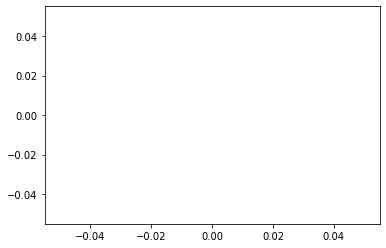

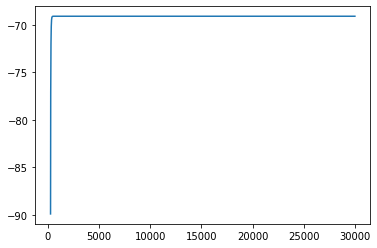

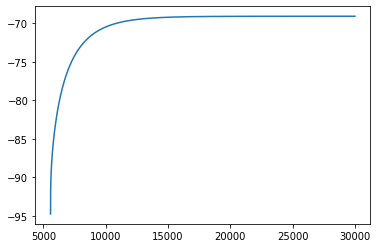

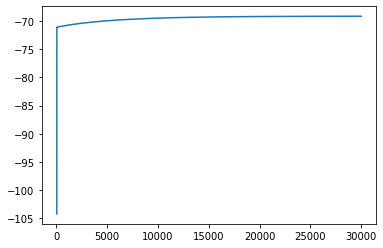

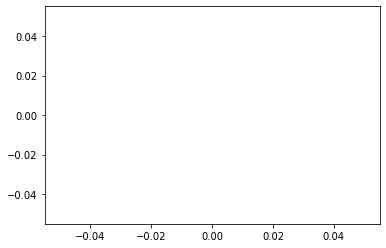

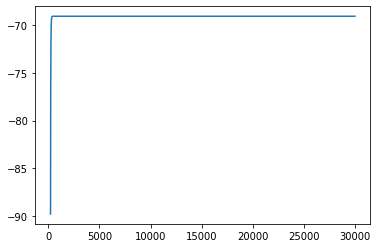

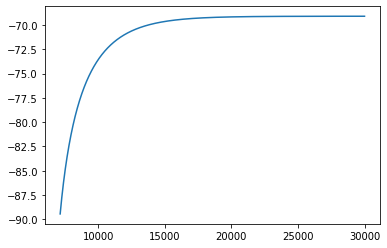

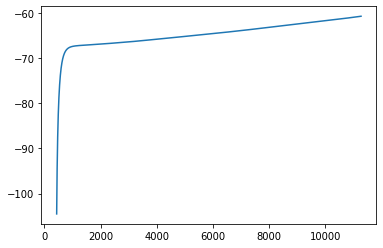

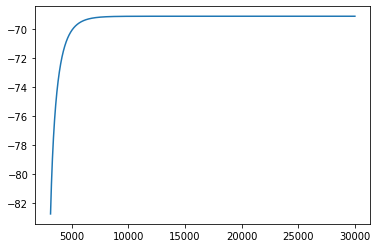

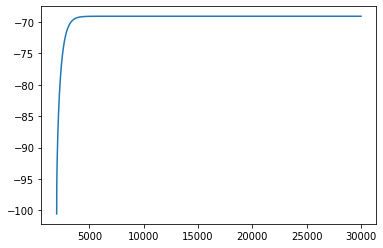

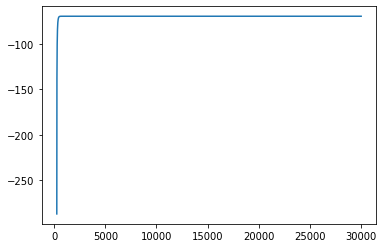

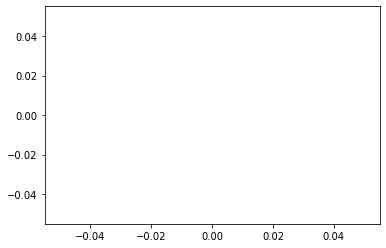

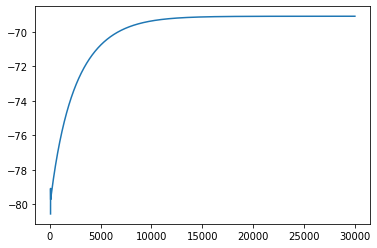

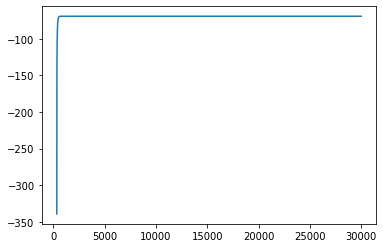

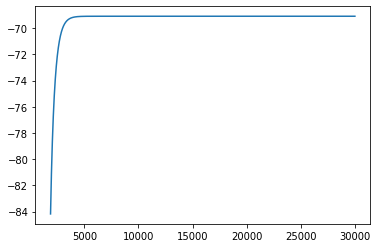

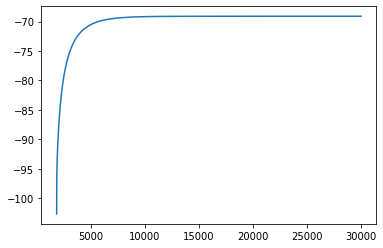

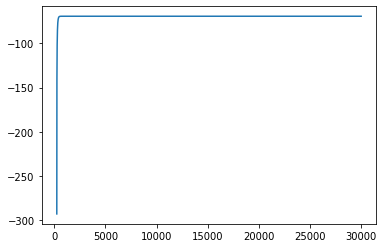

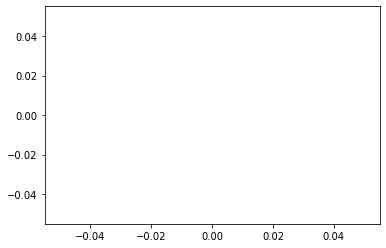

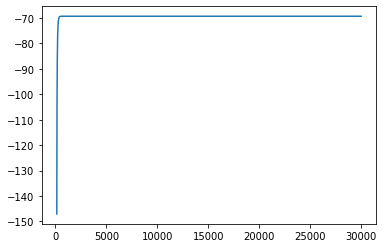

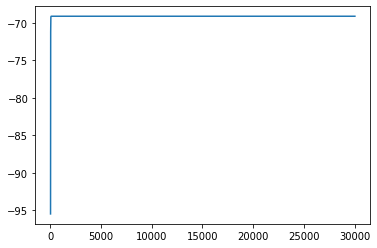

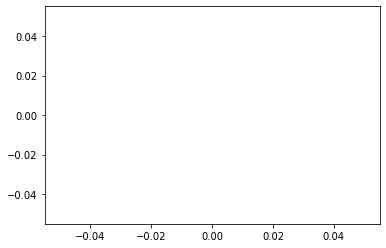

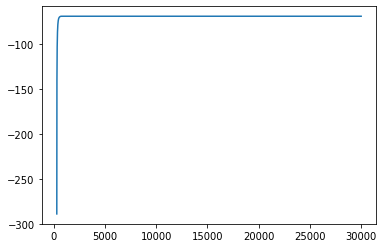

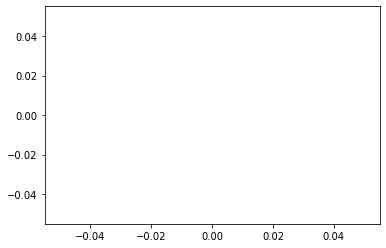

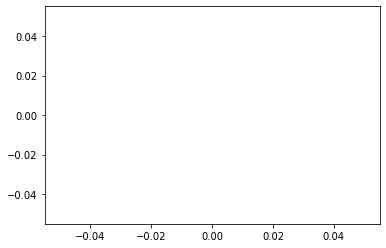

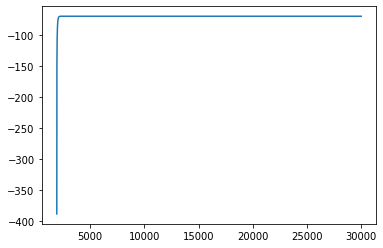

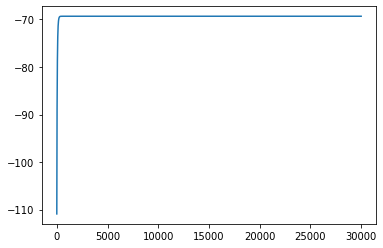

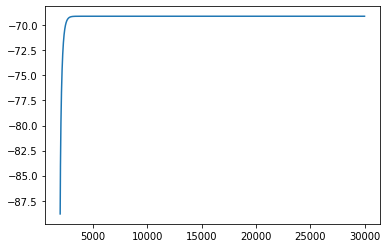

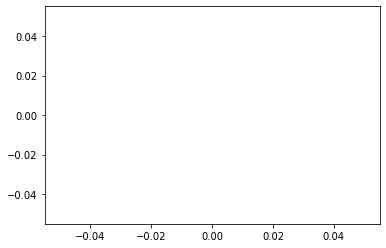

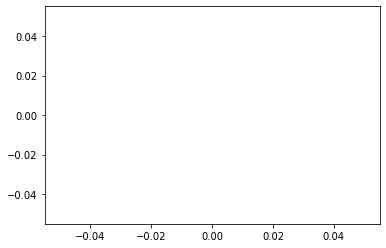

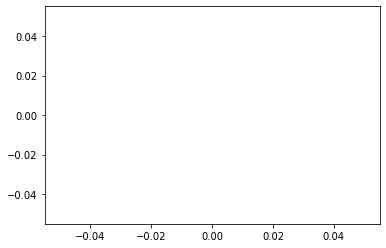

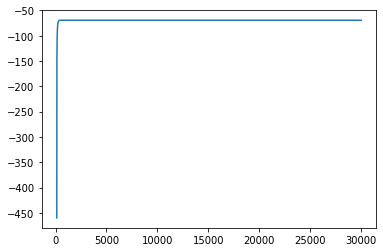

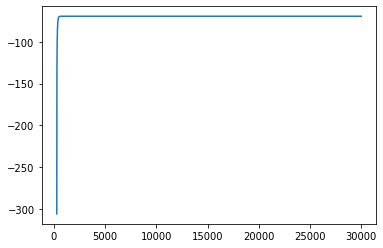

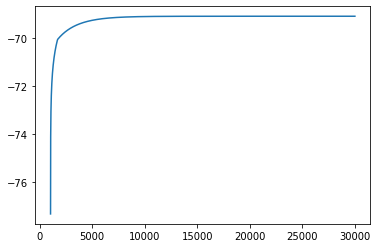

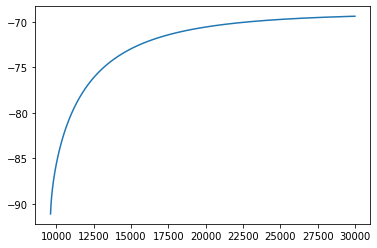

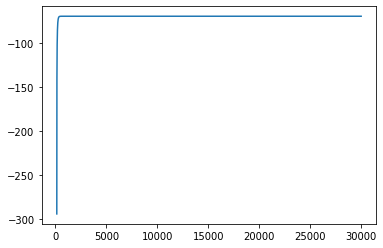

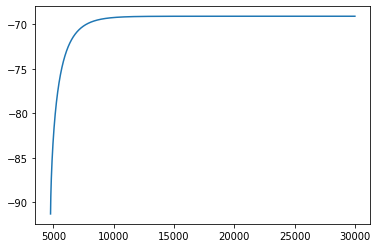

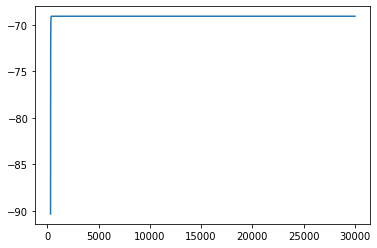

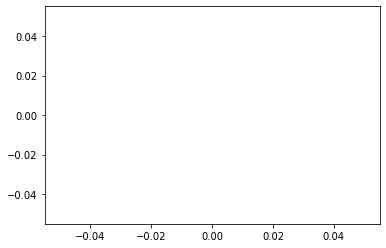

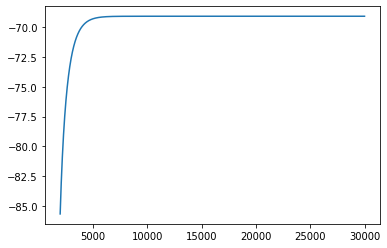

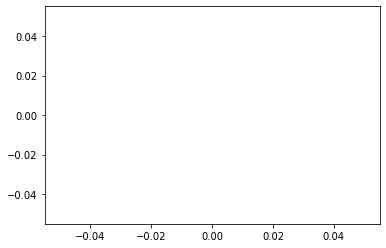

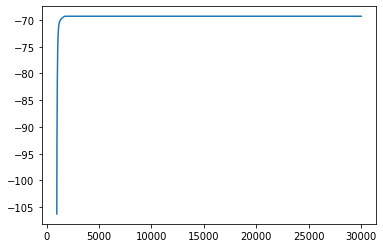

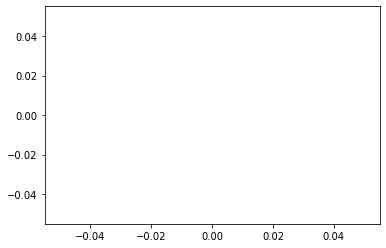

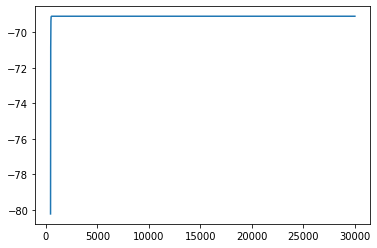

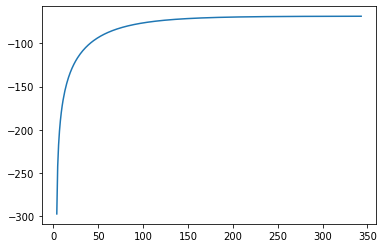

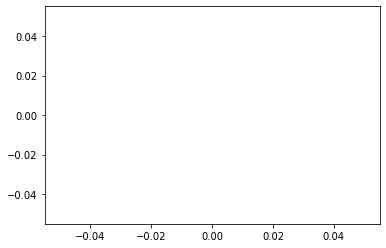

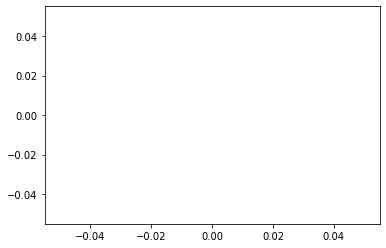

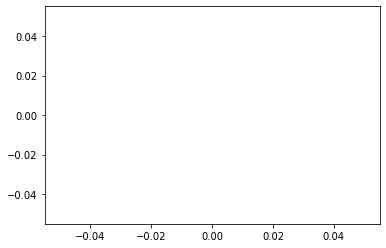

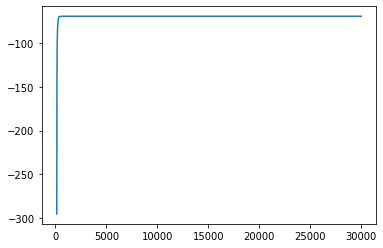

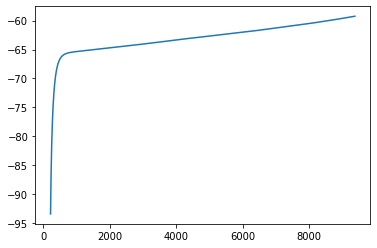

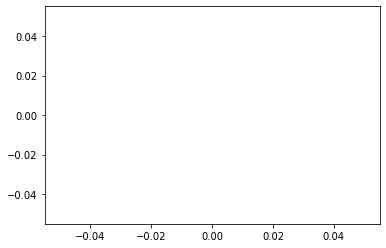

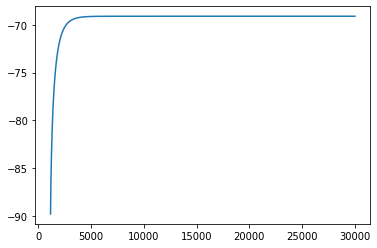

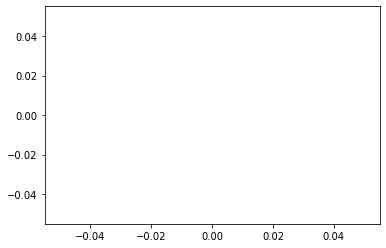

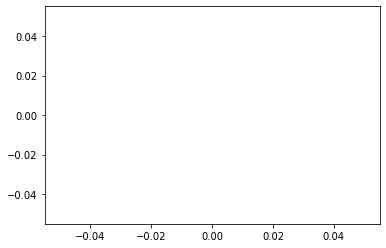

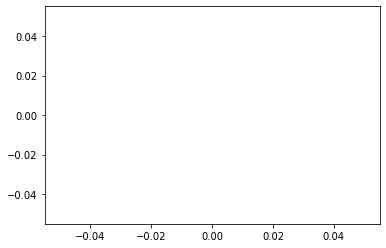

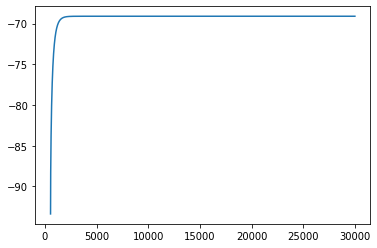

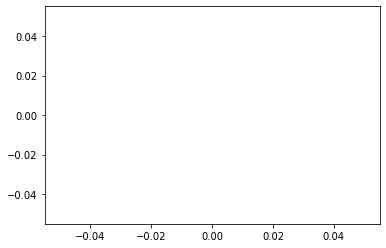

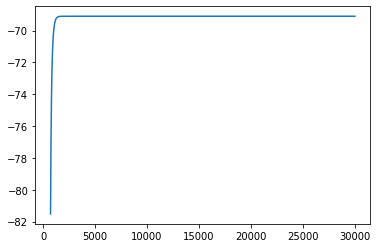

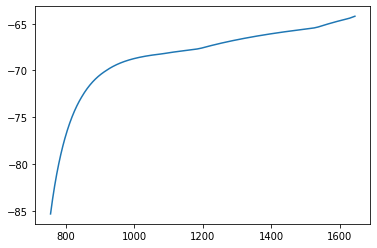

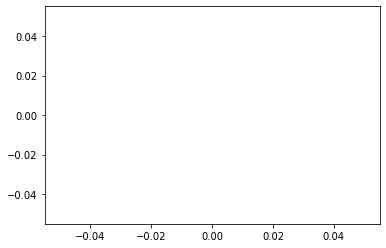

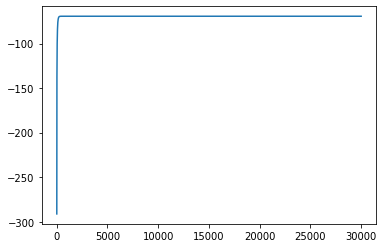

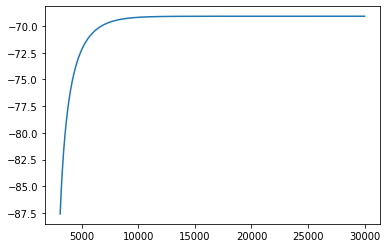

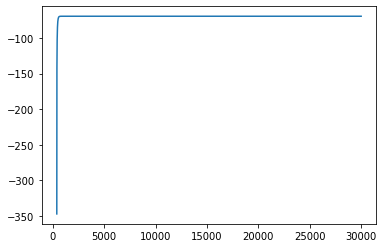

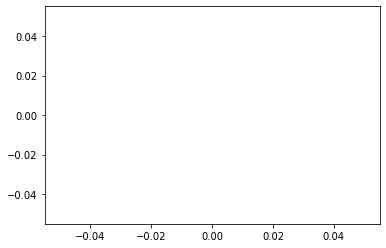

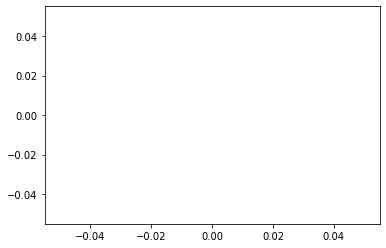

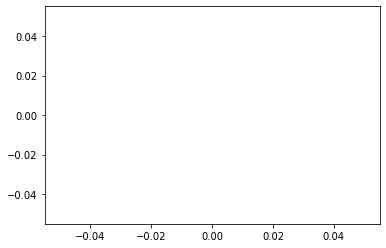

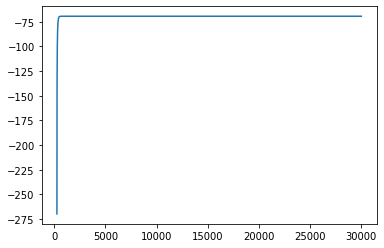

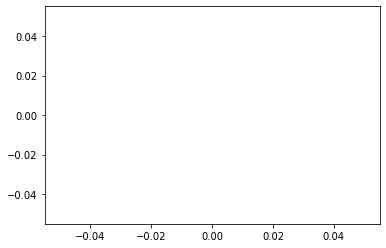

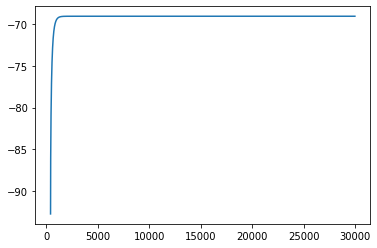

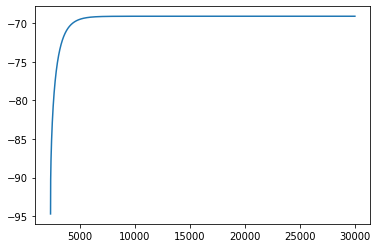

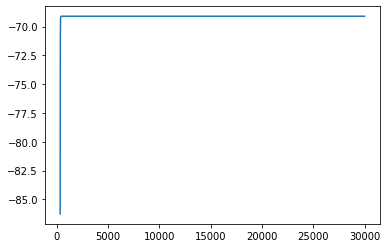

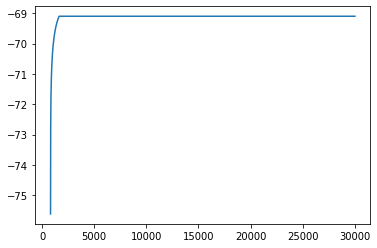

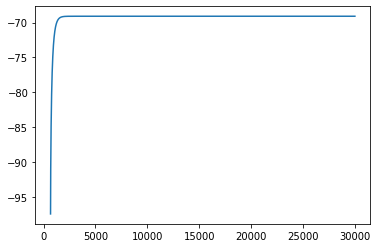

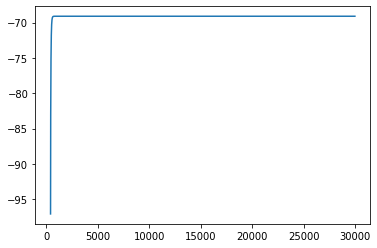

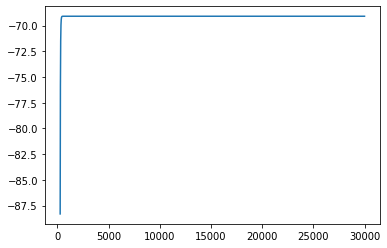

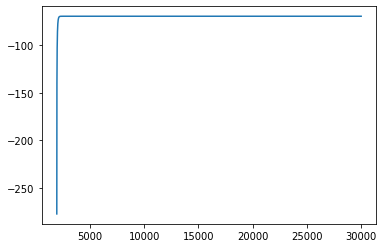

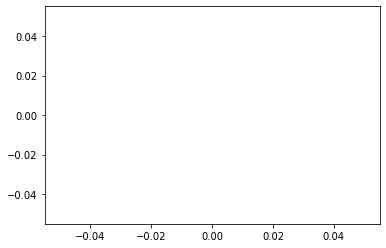

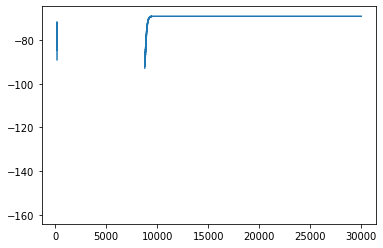

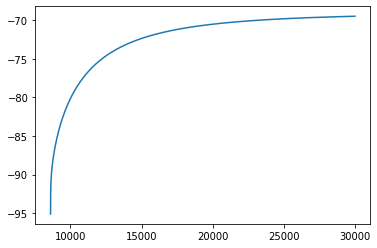

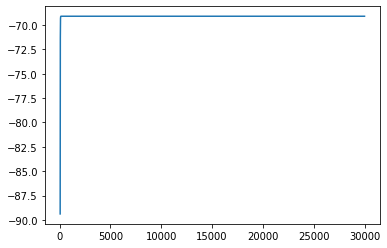

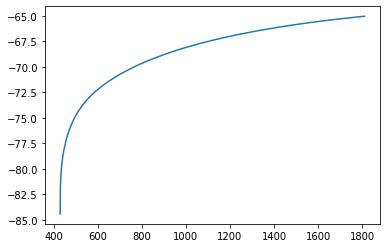

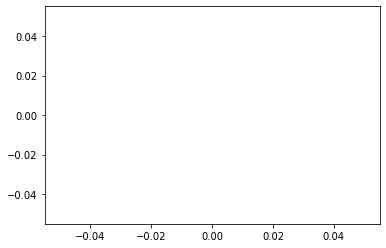

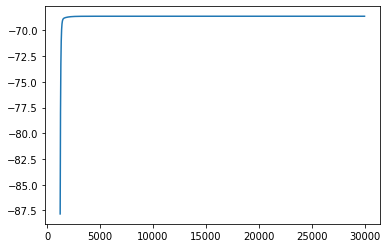

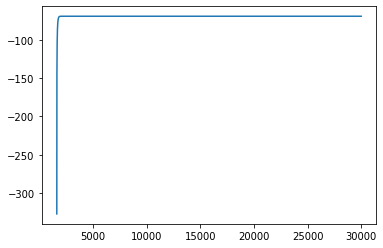

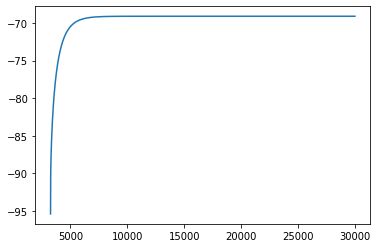

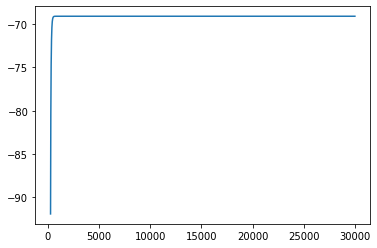

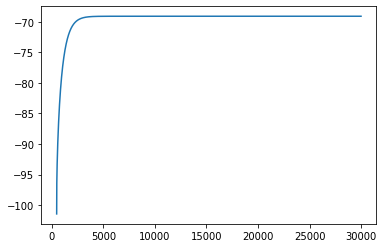

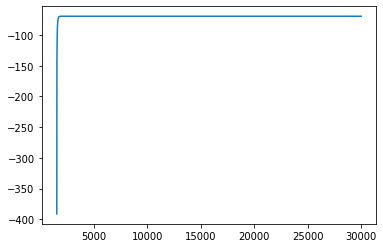

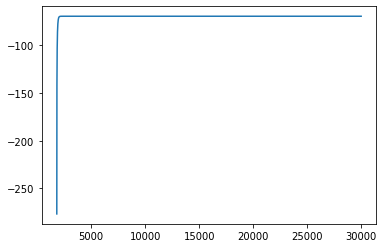

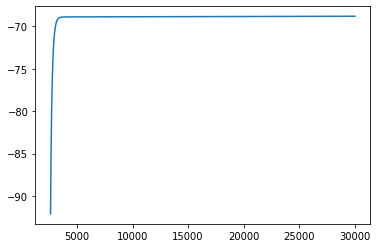

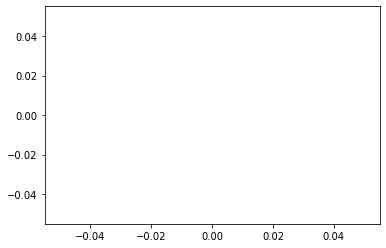

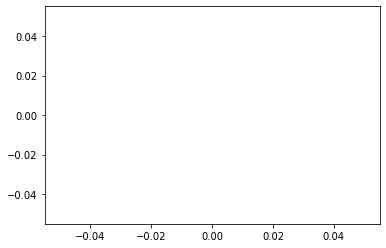

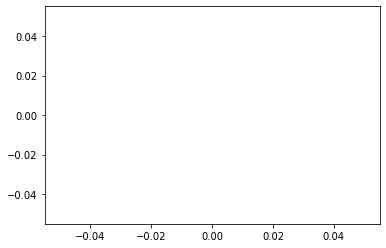

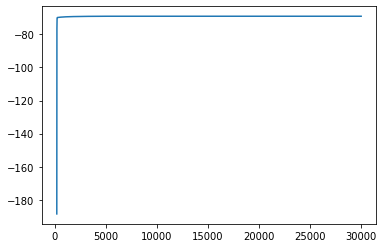

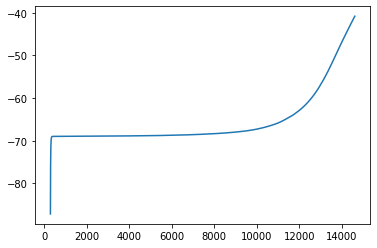

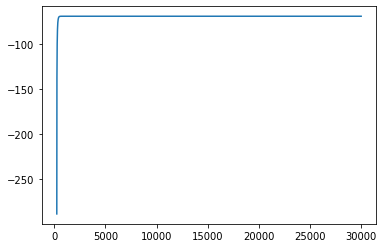

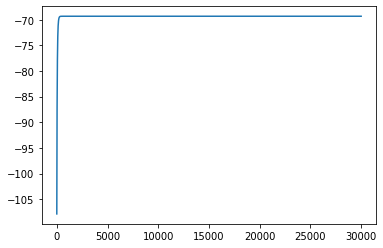

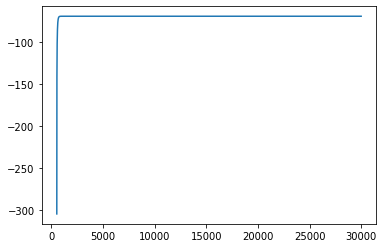

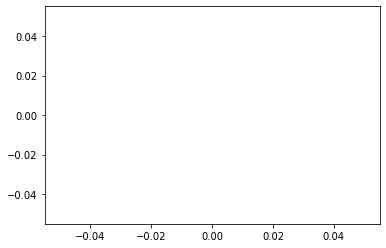

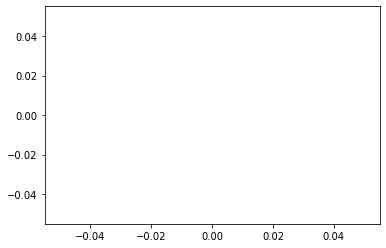

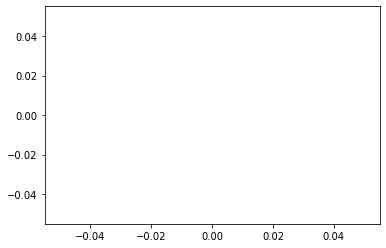

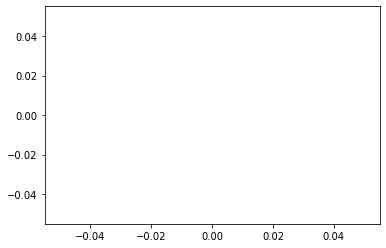

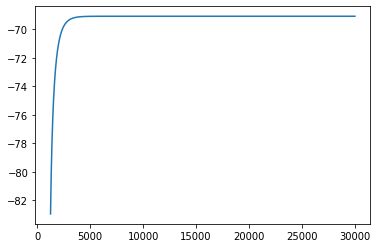

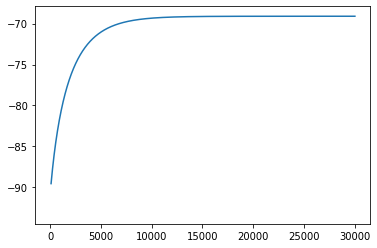

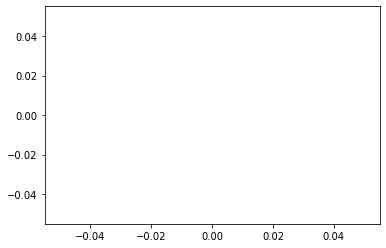

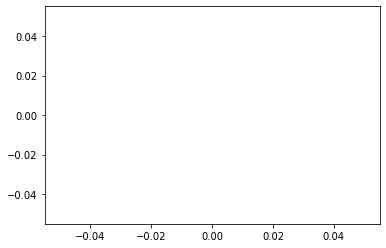

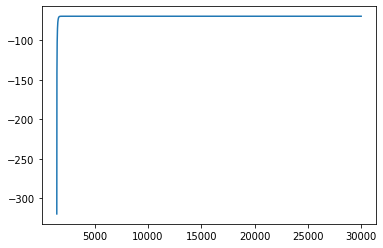

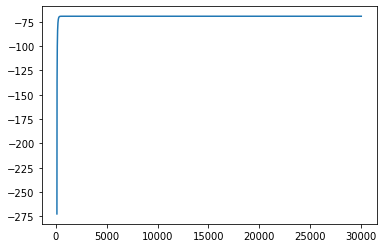

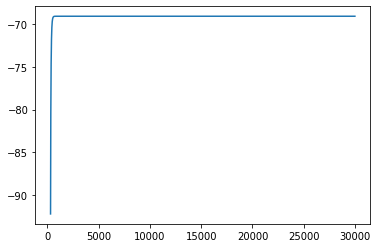

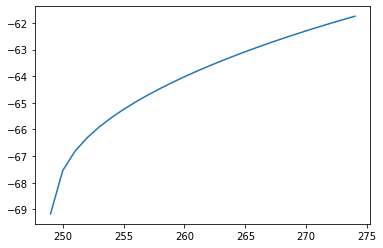

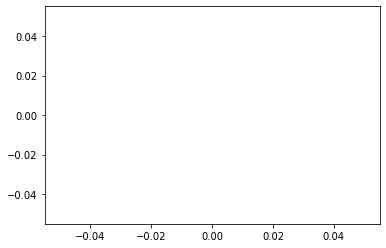

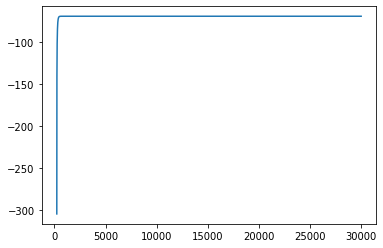

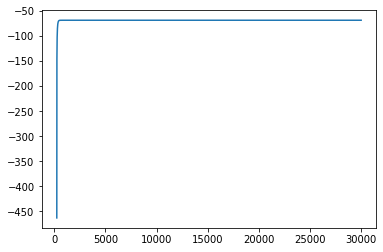

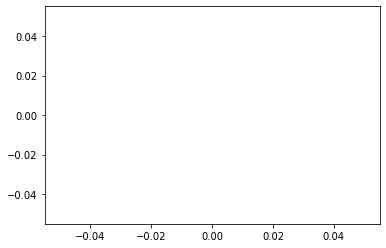

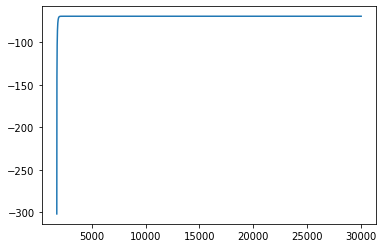

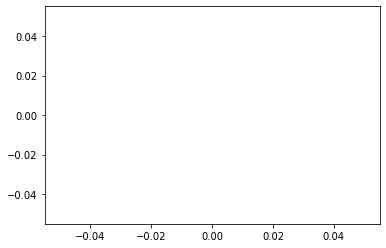

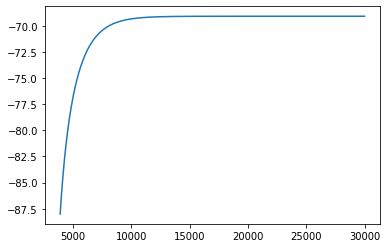

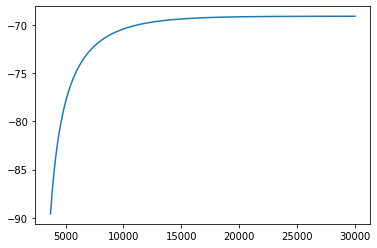

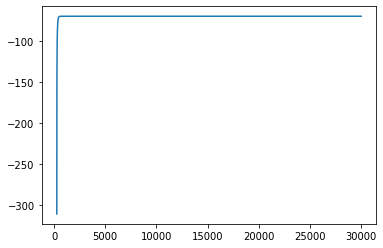

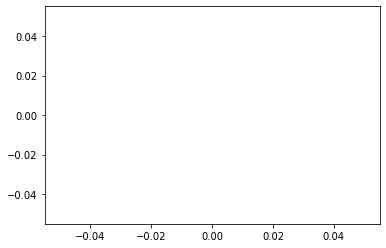

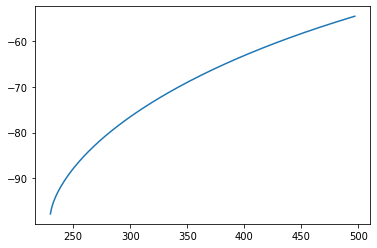

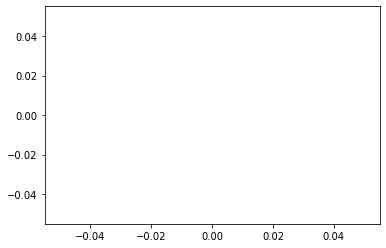

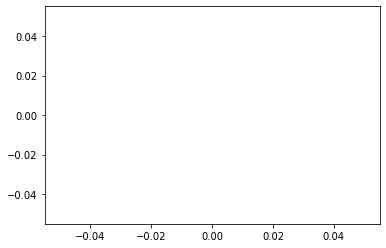

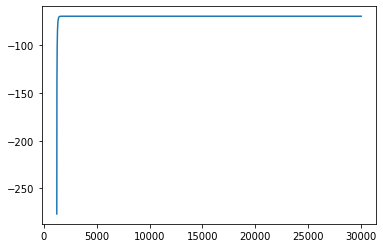

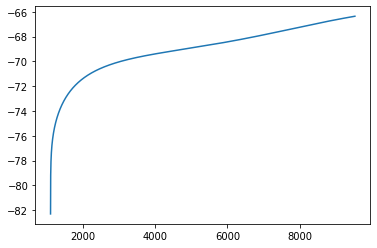

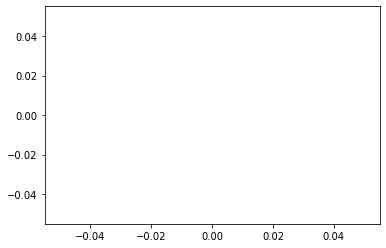

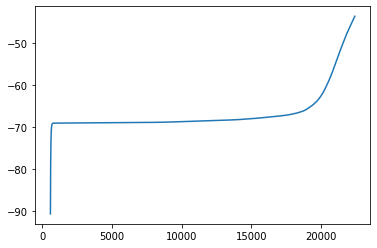

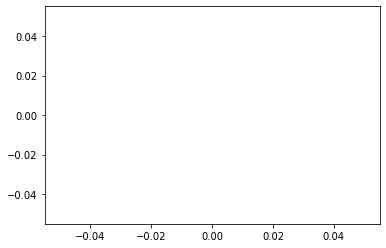

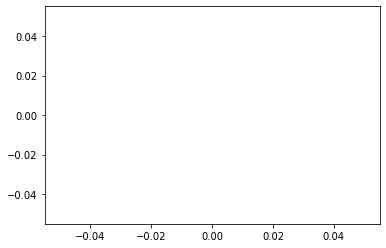

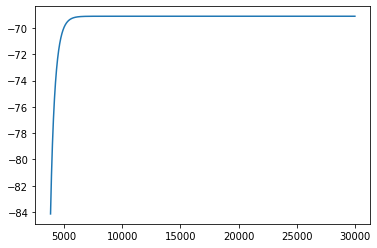

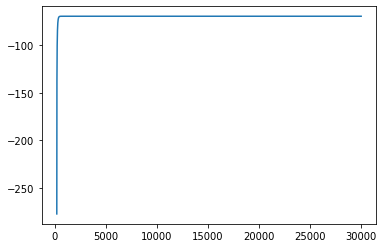

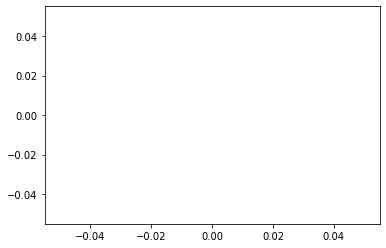

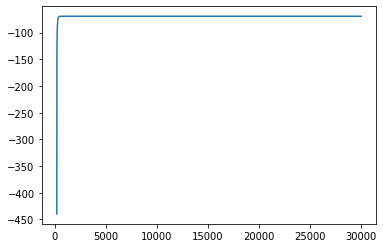

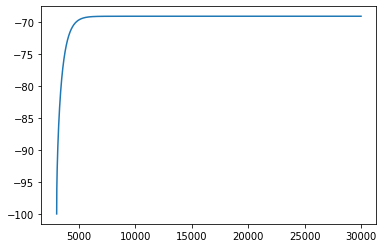

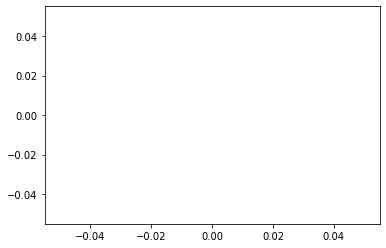

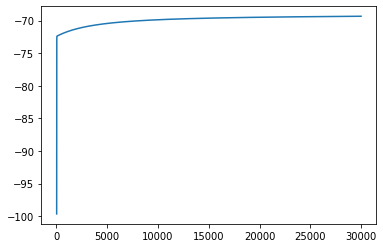

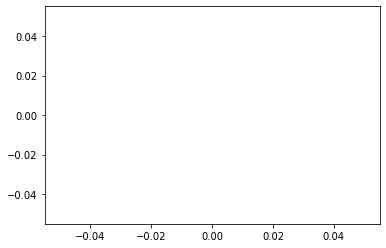

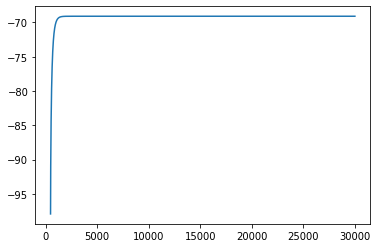

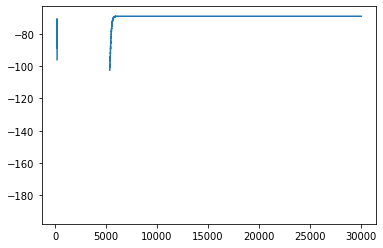

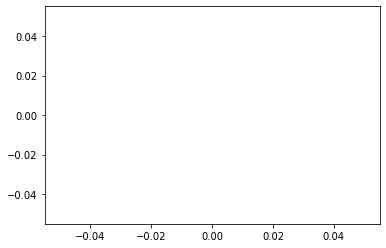

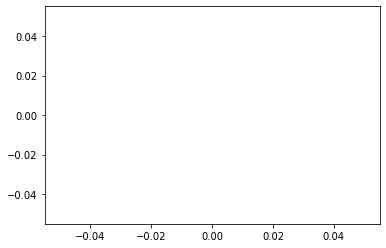

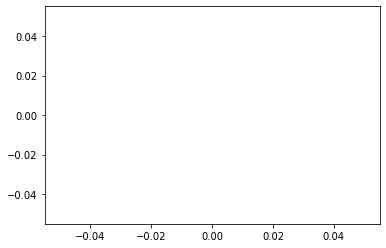

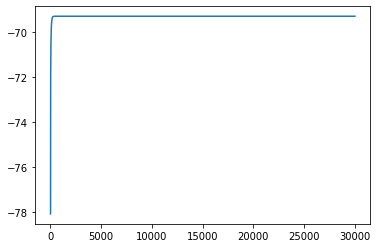

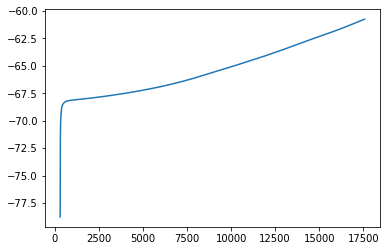

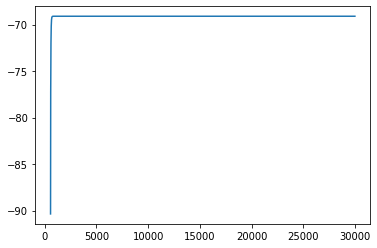

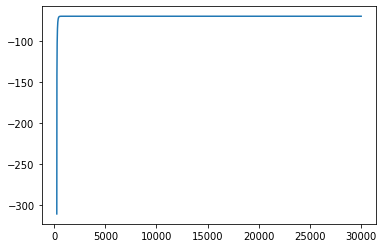

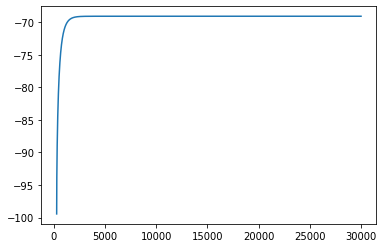

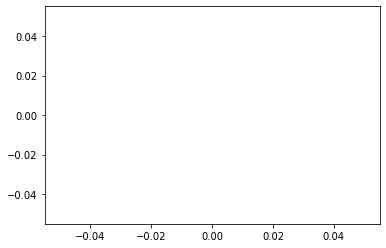

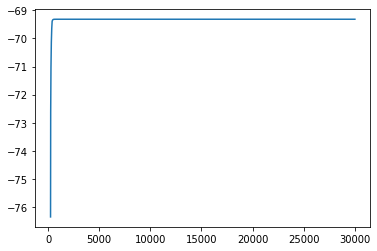

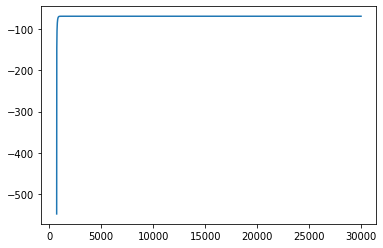

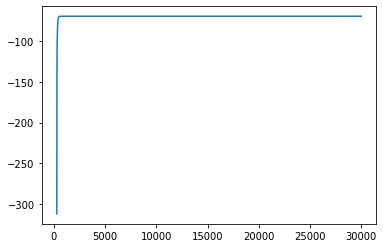

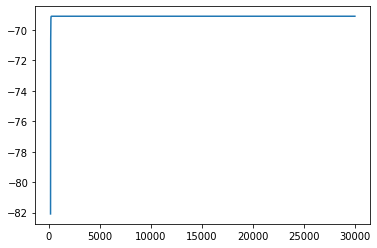

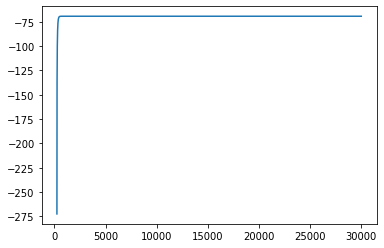

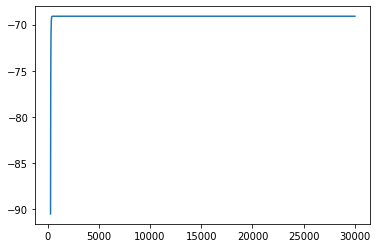

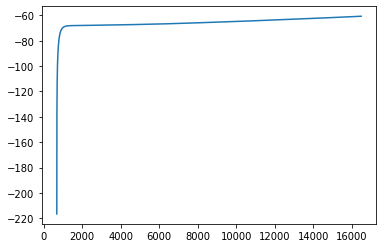

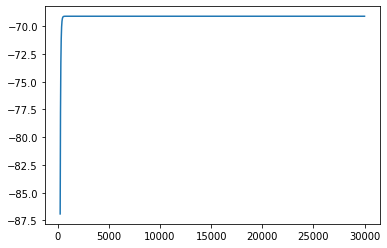

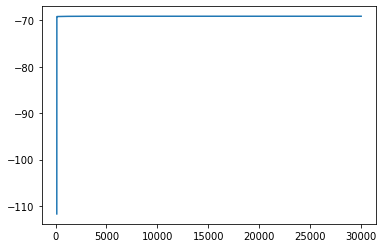

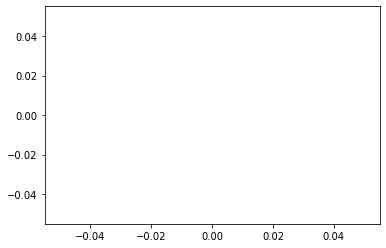

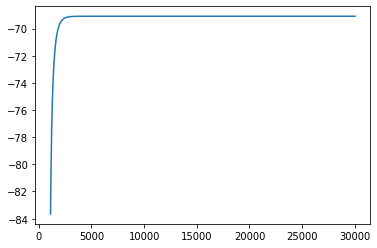

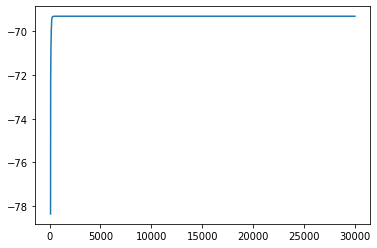

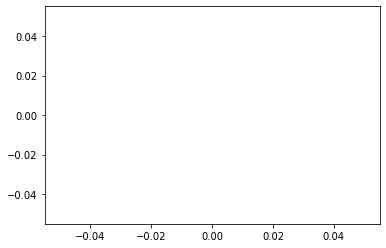

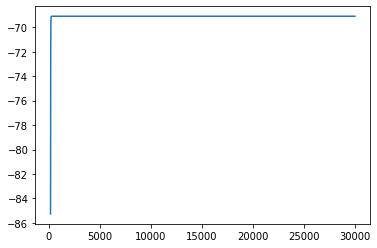

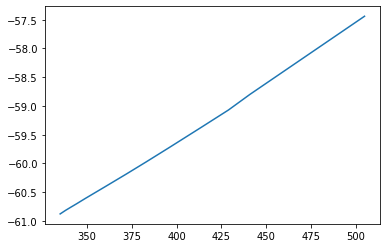

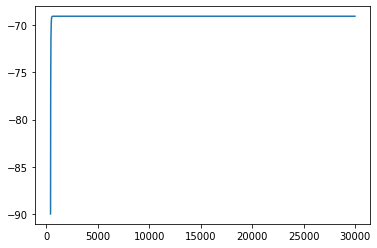

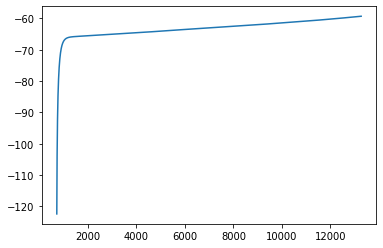

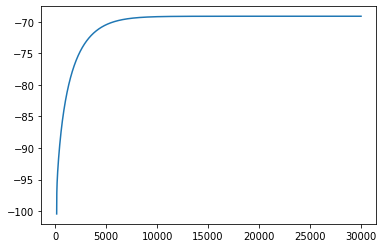

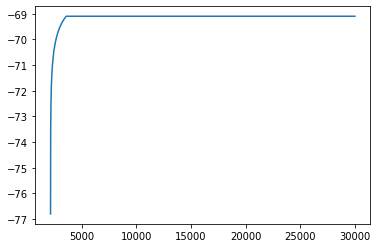

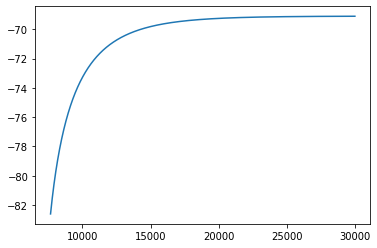

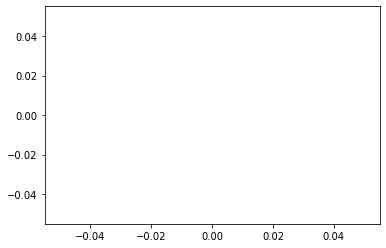

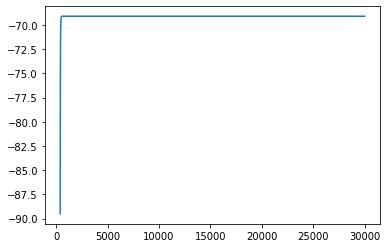

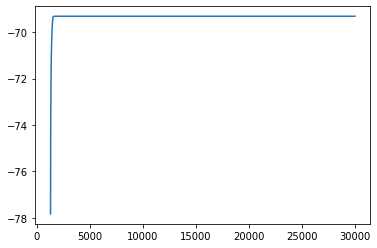

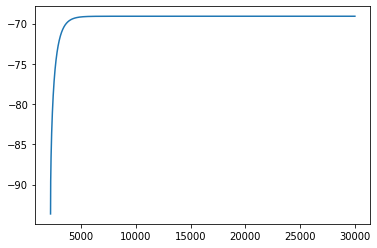

In [12]:
#plotting likelihood graph
for _,_,L_history in results:
    fig,ax = plt.subplots(1)
    ax.plot(L_history)
    plt.show()

In [13]:
accuracy_array = []
for a,w,_ in results:accuracy_array.append(a)
accuracy_array

[0.51,
 0.5,
 0.52,
 0.52,
 0.72,
 0.5,
 0.5,
 0.71,
 0.72,
 0.97,
 0.5,
 0.52,
 0.5,
 0.52,
 0.52,
 0.5,
 0.72,
 0.52,
 0.95,
 0.71,
 0.52,
 0.52,
 0.74,
 0.52,
 0.69,
 0.73,
 0.72,
 0.96,
 0.52,
 0.74,
 0.52,
 0.52,
 0.5,
 0.73,
 0.5,
 0.59,
 0.52,
 0.52,
 0.52,
 0.52,
 0.5,
 0.5,
 0.94,
 0.95,
 0.52,
 0.52,
 0.75,
 0.52,
 0.52,
 0.5,
 0.95,
 0.71,
 0.5,
 0.5,
 0.52,
 0.69,
 0.95,
 0.52,
 0.52,
 0.52,
 0.71,
 0.51,
 0.52,
 0.94,
 0.52,
 0.52,
 0.5,
 0.73,
 0.5,
 0.52,
 0.71,
 0.47,
 0.5,
 0.5,
 0.52,
 0.5,
 0.52,
 0.72,
 0.94,
 0.72,
 0.71,
 0.48,
 0.52,
 0.52,
 0.91,
 0.72,
 0.54,
 0.95,
 0.52,
 0.52,
 0.52,
 0.71,
 0.5,
 0.52,
 0.5,
 0.73,
 0.52,
 0.52,
 0.5,
 0.5,
 0.5,
 0.72,
 0.73,
 0.52,
 0.52,
 0.5,
 0.52,
 0.72,
 0.5,
 0.5,
 0.52,
 0.52,
 0.97,
 0.52,
 0.52,
 0.5,
 0.52,
 0.52,
 0.5,
 0.52,
 0.71,
 0.52,
 0.5,
 0.52,
 0.52,
 0.71,
 0.52,
 0.52,
 0.72,
 0.52,
 0.5,
 0.52,
 0.51,
 0.5,
 0.95,
 0.96,
 0.52,
 0.52,
 0.5,
 0.52,
 0.5,
 0.69,
 0.52,
 0.52,
 0.52,
 0.52,
 0.72,
 0.9

In [14]:
max(accuracy_array)

0.97

## Seeing the decision making function

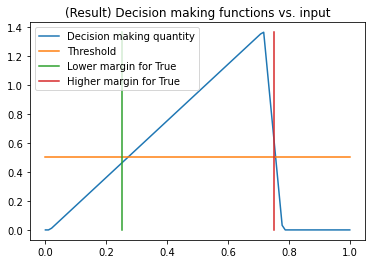

In [15]:
#seeing the decision making function
if 'need':
    _,(w1,w2,b1,b2,theta1,theta2,k),_ = results[np.argmax(accuracy_array)]
    test_t = np.linspace(0,1,100)
    y_decision = np.zeros(test_t.shape)
    for i,t in enumerate(test_t):
        z1 = ReLu(w1*t+b1)
        z2 = ReLu(w2*t+b2)
        A =  ReLu(theta1*z1+theta2*z2+k)
        y_decision[i] = A

    fig,ax = plt.subplots(1)
    ax.plot(test_t,y_decision,label='Decision making quantity')
    ax.plot([0,1],[0.5,0.5],label='Threshold')
    ax.plot([0.25,0.25],[0,max(y_decision)],label='Lower margin for True')
    ax.plot([0.75,0.75],[0,max(y_decision)],label='Higher margin for True')
    ax.set_title('(Result) Decision making functions vs. input')
    ax.legend()
    plt.show()

In [16]:
w1,w2,b1,b2,theta1,theta2,k

(3.484741897066699,
 2.446746149275269,
 -2.4979925912117875,
 7.103700928646634,
 -6.866141035162542,
 0.7974982344905751,
 -5.692958469733425)